<a href="https://colab.research.google.com/github/jaiswalgaurav012002/ML-R-D-task1/blob/main/AI_ML_research_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install seaborn
!pip install seaborn
!pip install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [22]:
import sklearn
print(sklearn.__version__)


1.2.2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
import pandas as pd
wine_dataset = pd.read_csv('winequality-red.csv')

In [25]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [26]:
# first 5 rows of the dataset
wine_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [27]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
# statistical measures of the dataset
wine_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<Axes: xlabel='quality', ylabel='volatile acidity'>

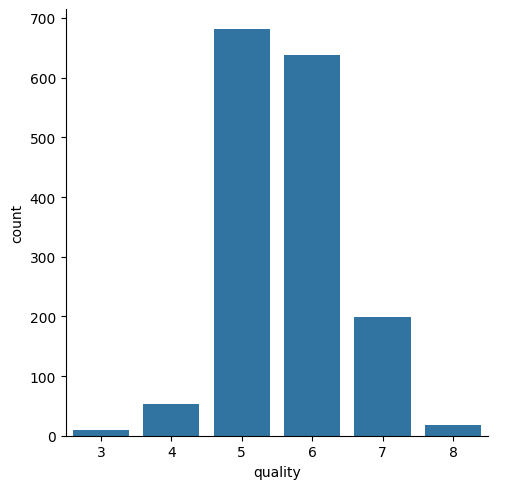

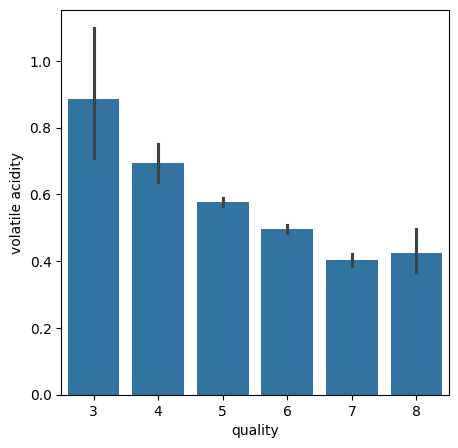

In [29]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

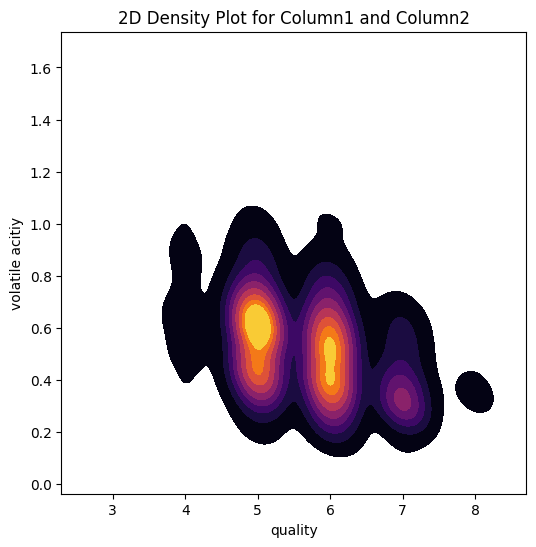

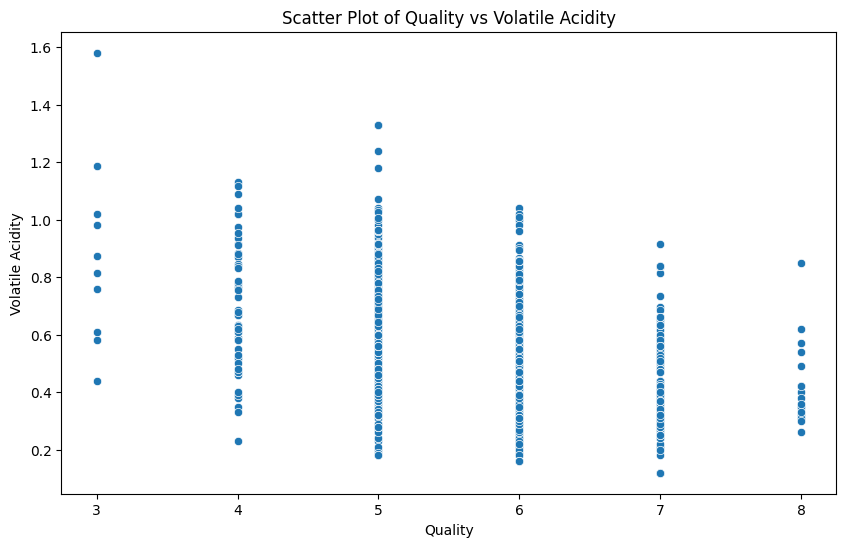

Defaulting to user installation because normal site-packages is not writeable


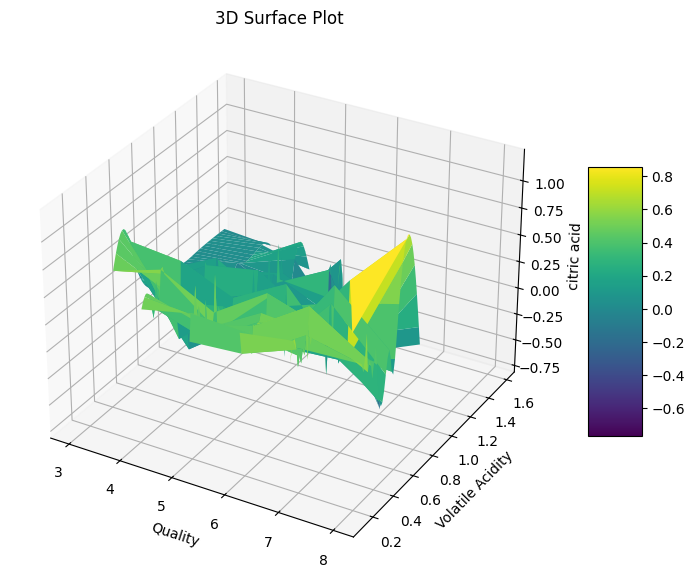

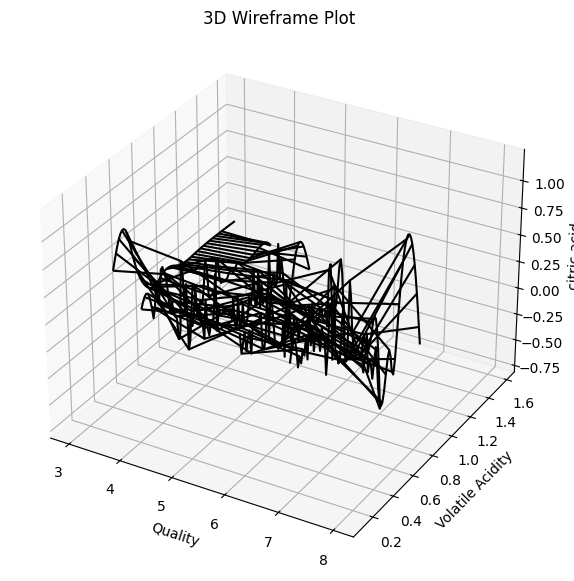

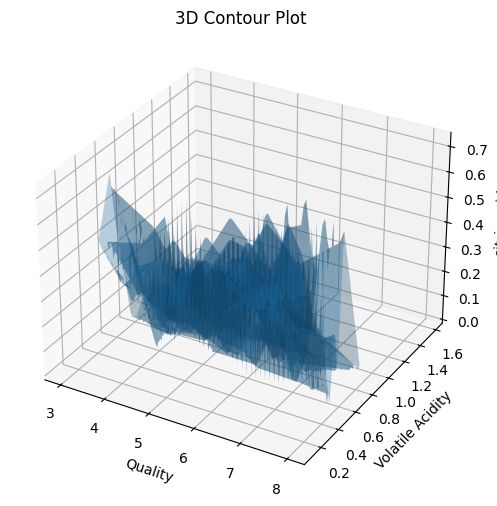

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Column1', 'Column2' are the columns you selected
plt.figure(figsize=(6, 6))
sns.kdeplot(data=wine_dataset, x="quality", y="volatile acidity", cmap="inferno", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('quality')
plt.ylabel('volatile acitiy')
plt.show()

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality', y='volatile acidity', data=wine_dataset)

# Adding title and labels
plt.title('Scatter Plot of Quality vs Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')

# Displaying the plot
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()

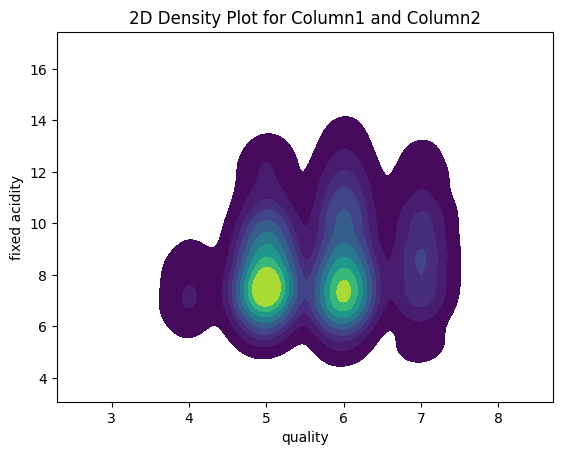

Defaulting to user installation because normal site-packages is not writeable


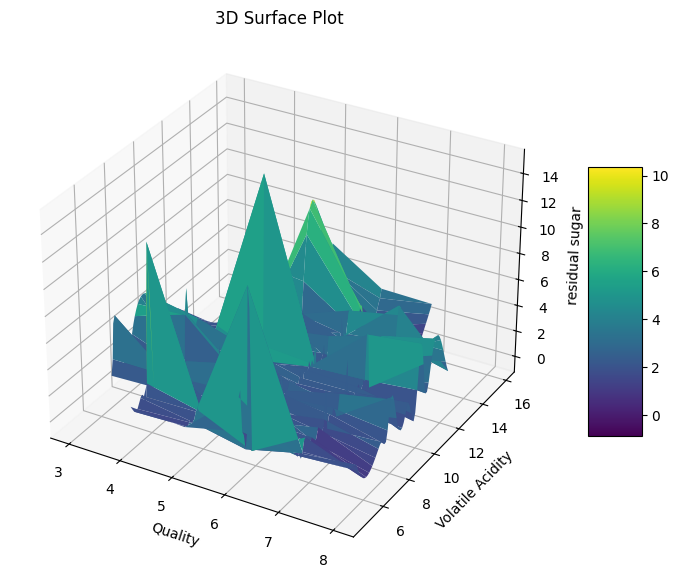

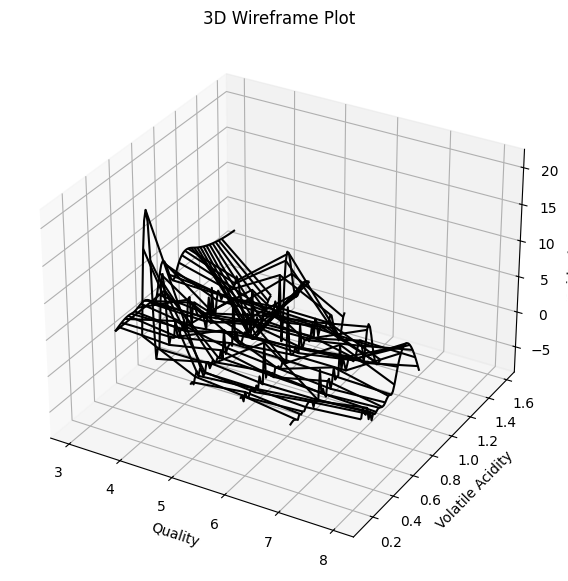

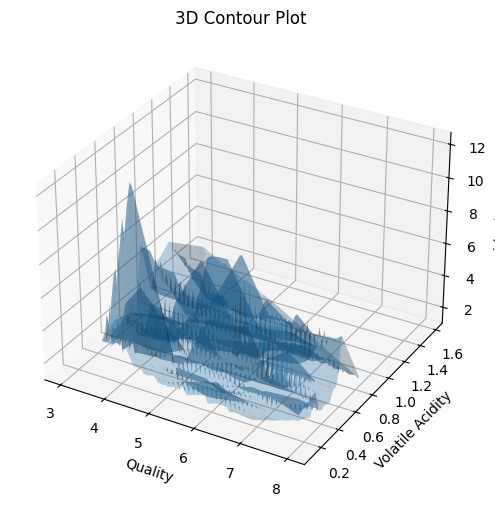

In [31]:
sns.kdeplot(data=wine_dataset, x="quality", y="fixed acidity", cmap="viridis", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'quality' and 'volatile acidity' columns
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['quality']
y = wine_dataset['volatile acidity']
z = wine_dataset['residual sugar']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('Quality')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('residual sugar')
ax.set_title('3D Contour Plot')

plt.show()


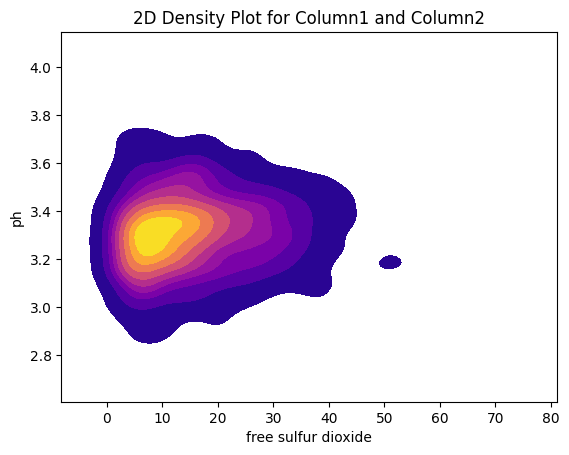

Defaulting to user installation because normal site-packages is not writeable


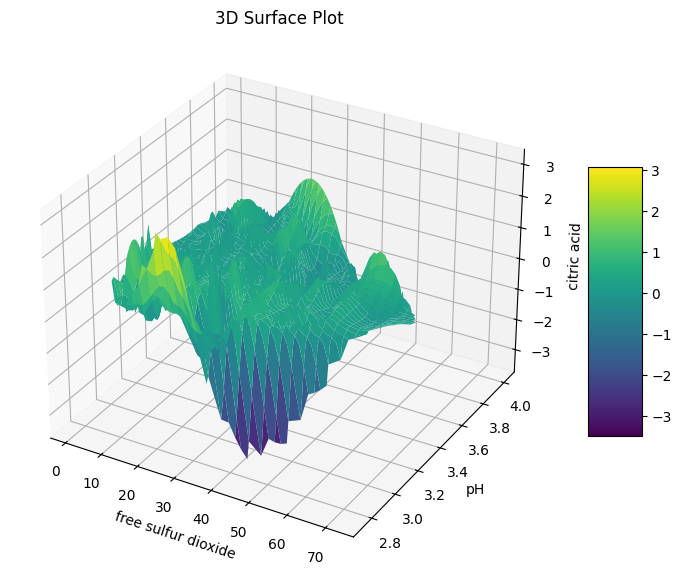

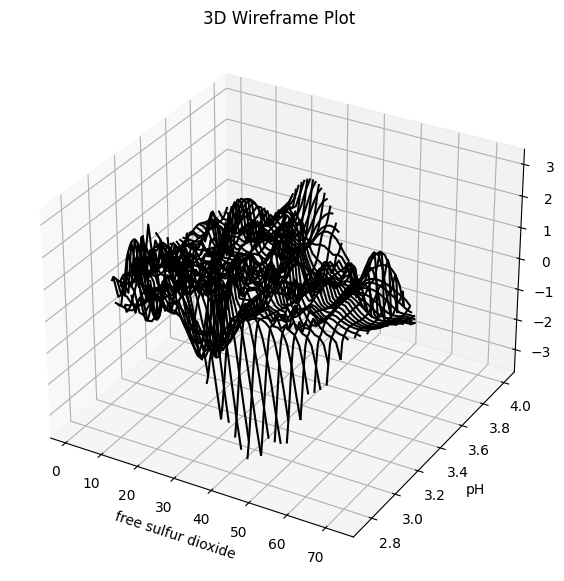

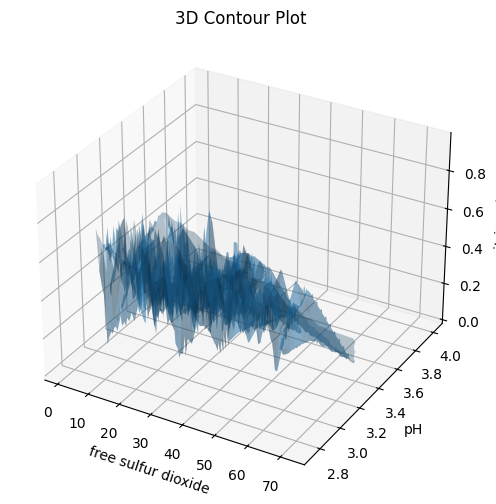

In [32]:
sns.kdeplot(data=wine_dataset, x="free sulfur dioxide", y="pH", cmap="plasma", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('free sulfur dioxide')
plt.ylabel('ph')
plt.show()

!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'free sulfur dioxide' and 'pH' columns
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'free sulfur dioxide' and 'pH' columns
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['free sulfur dioxide']
y = wine_dataset['pH']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('free sulfur dioxide')
ax.set_ylabel('pH')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()

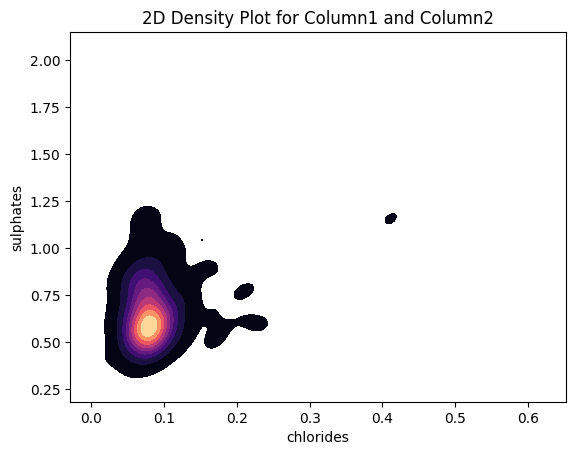

Defaulting to user installation because normal site-packages is not writeable


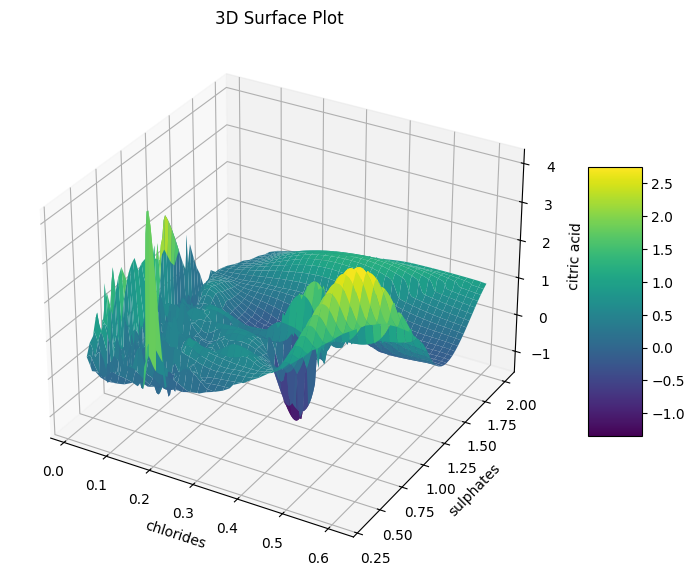

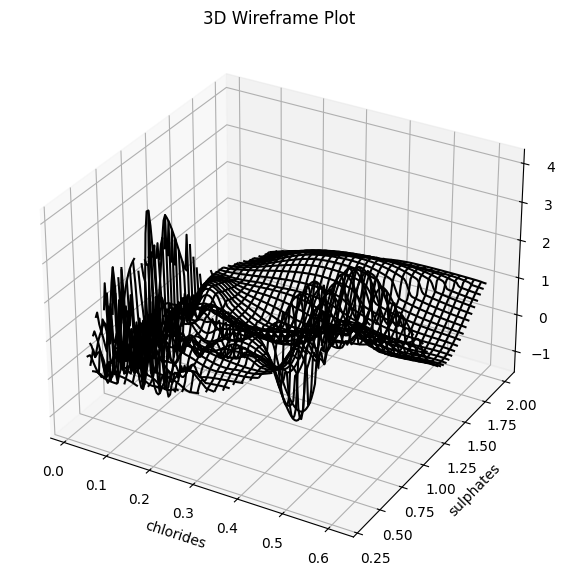

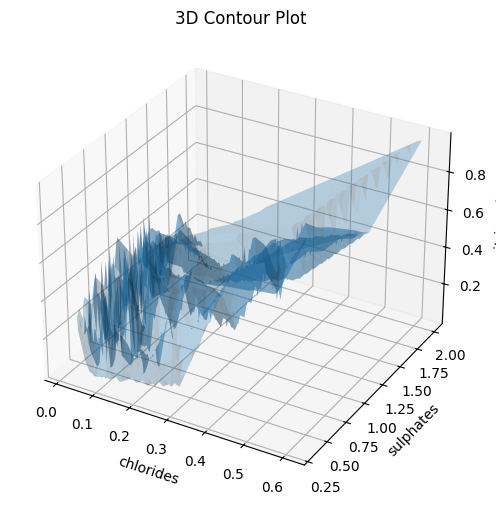

In [33]:
sns.kdeplot(data=wine_dataset, x="chlorides", y="sulphates", cmap="magma", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('chlorides')
plt.ylabel('sulphates')
plt.show()

!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'chlorides' and 'sulphates' columns
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'chlorides' and 'sulphates' columns
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['chlorides']
y = wine_dataset['sulphates']
z = wine_dataset['citric acid']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('chlorides')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')
ax.set_title('3D Contour Plot')

plt.show()

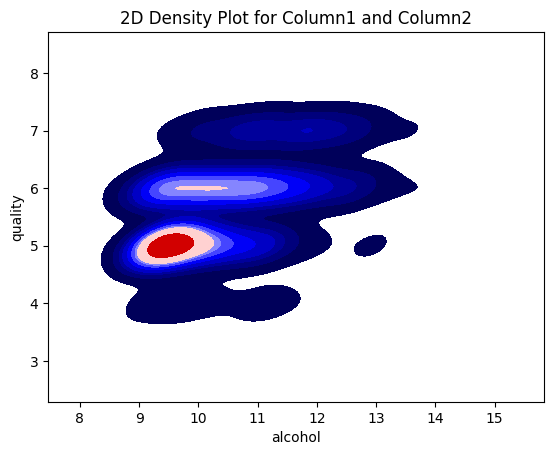

In [34]:
sns.kdeplot(data=wine_dataset, x="alcohol", y="quality", cmap="seismic", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

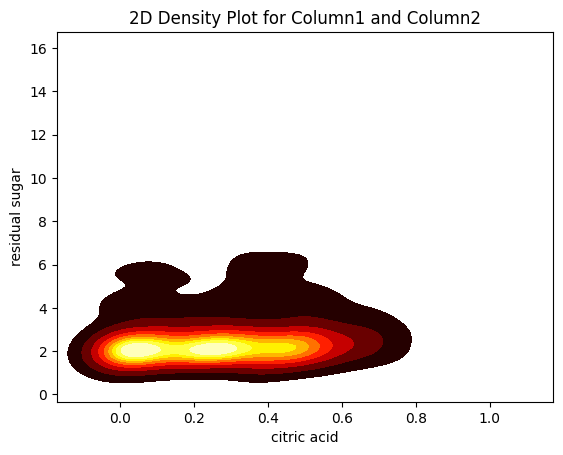

Defaulting to user installation because normal site-packages is not writeable


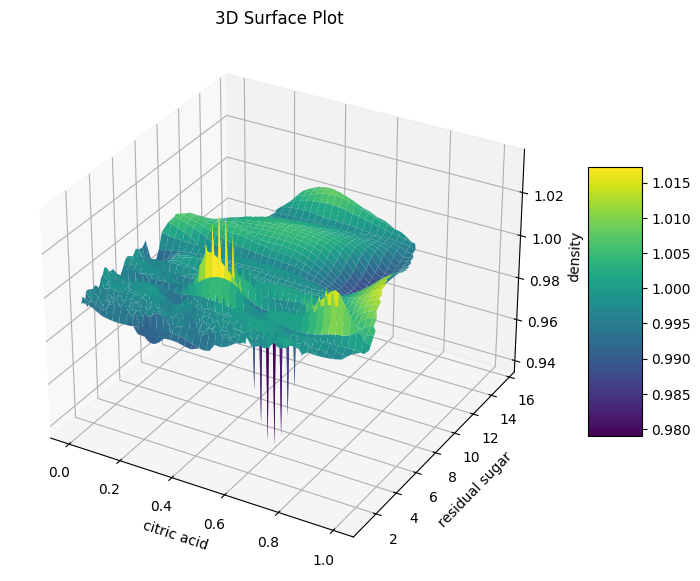

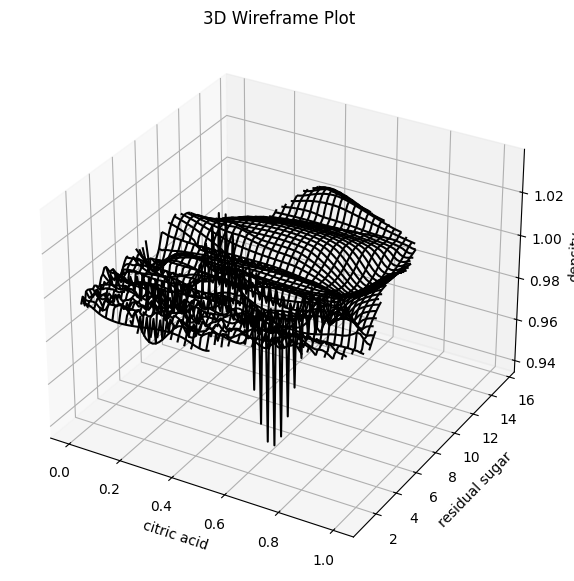

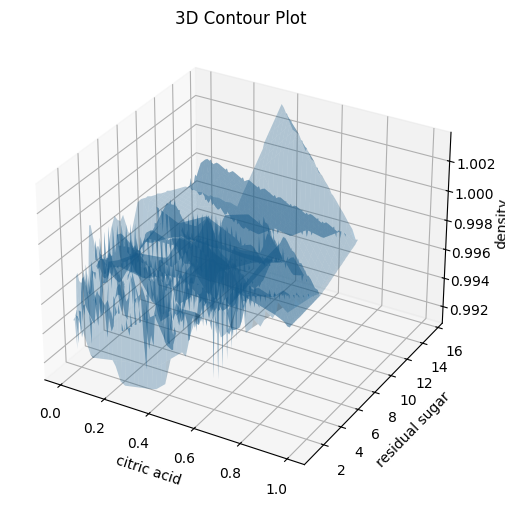

In [35]:
sns.kdeplot(data=wine_dataset, x="citric acid", y="residual sugar", cmap="hot", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('citric acid')
plt.ylabel('residual sugar')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citic acid' and 'residual sugar' columns
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citic acid' and 'residual sugar' columns
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['citric acid']
y = wine_dataset['residual sugar']
z = wine_dataset['density']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('residual sugar')
ax.set_zlabel('density')
ax.set_title('3D Contour Plot')

plt.show()

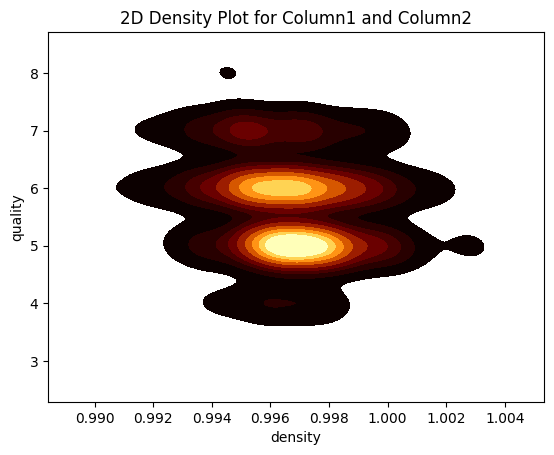

Defaulting to user installation because normal site-packages is not writeable


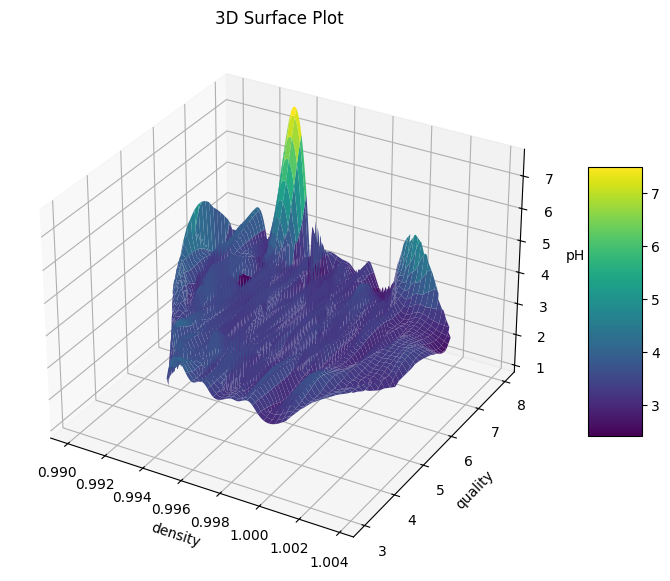

Defaulting to user installation because normal site-packages is not writeable


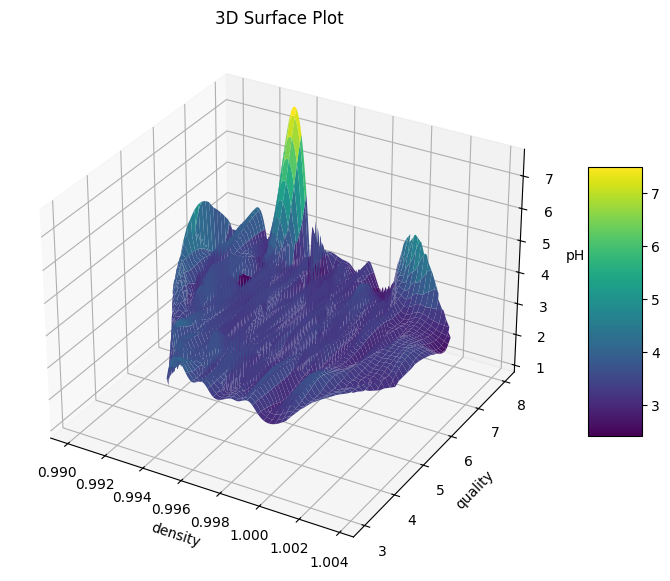

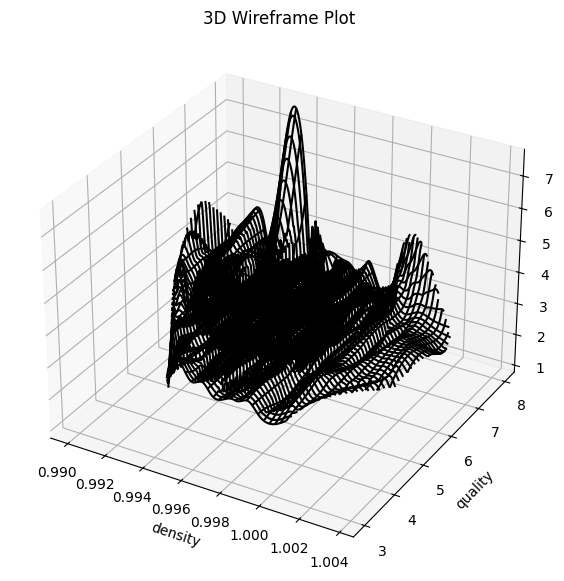

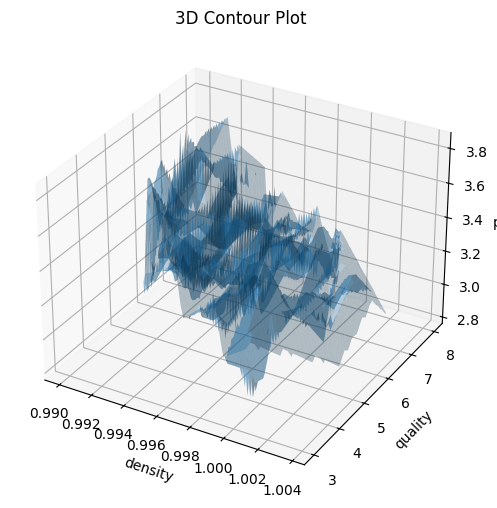

In [36]:
sns.kdeplot(data=wine_dataset, x="density", y="quality", cmap="afmhot", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('density')
plt.ylabel('quality')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'density' and 'quality' columns
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['density']
y = wine_dataset['quality']
z = wine_dataset['pH']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('density')
ax.set_ylabel('quality')
ax.set_zlabel('pH')
ax.set_title('3D Contour Plot')

plt.show()


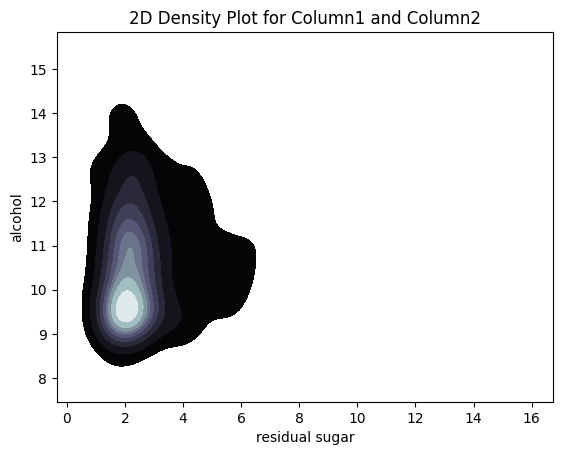

Defaulting to user installation because normal site-packages is not writeable


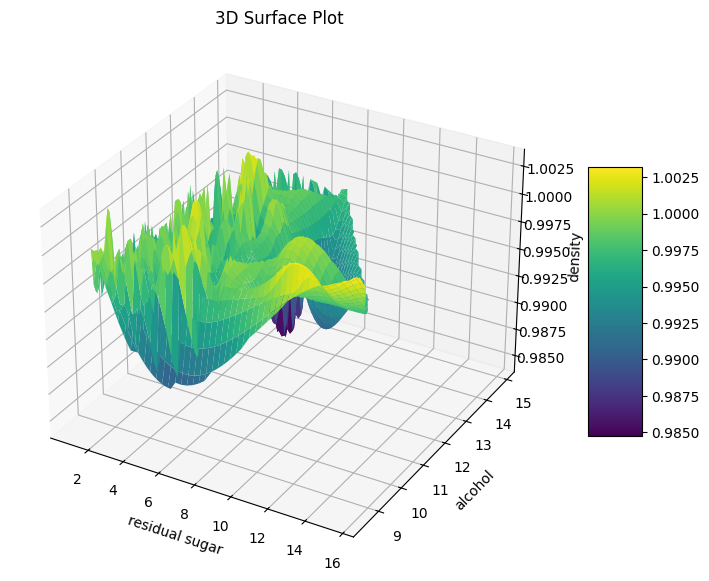

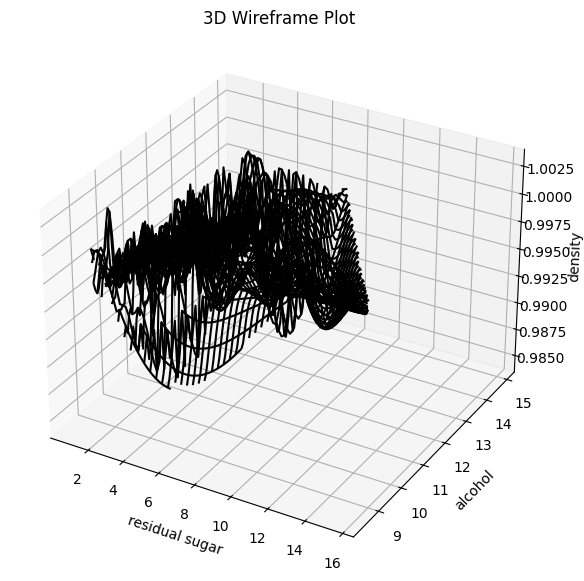

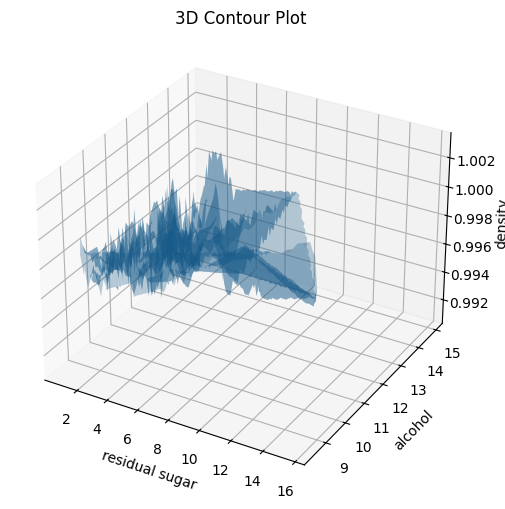

In [37]:
sns.kdeplot(data=wine_dataset, x="residual sugar", y="alcohol", cmap="bone", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()
#density
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'residual sugar' and 'alcohol' columns
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'residual sugar' and 'alcohol' columns
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['residual sugar']
y = wine_dataset['alcohol']
z = wine_dataset['density']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('residual sugar')
ax.set_ylabel('alcohol')
ax.set_zlabel('density')
ax.set_title('3D Contour Plot')

plt.show()

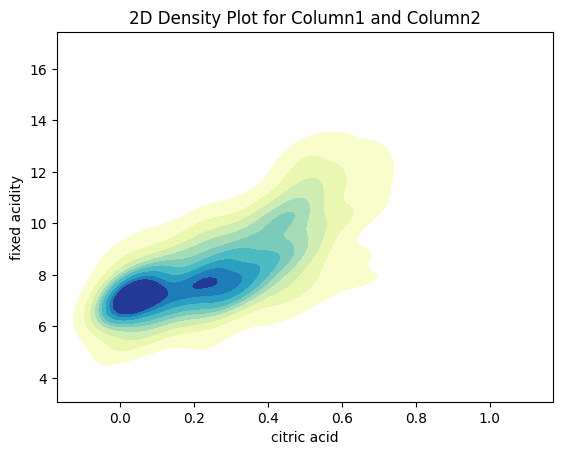

Defaulting to user installation because normal site-packages is not writeable


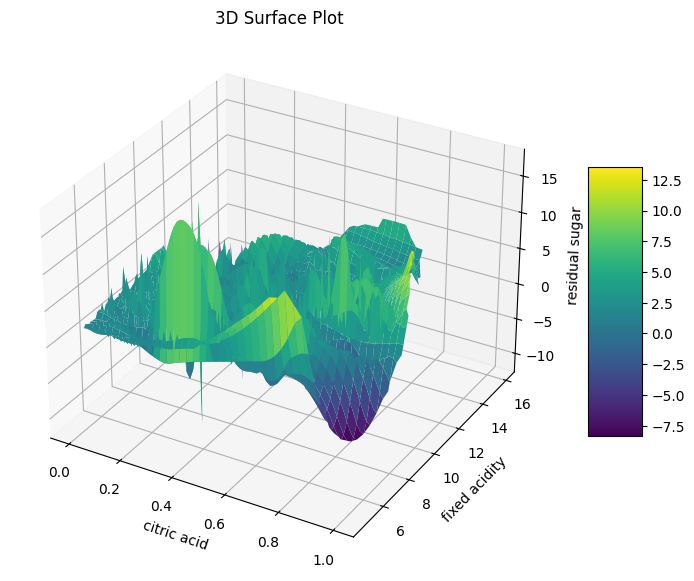

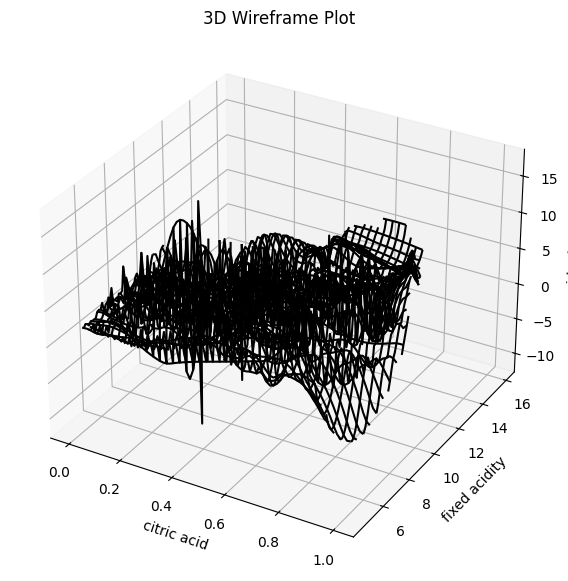

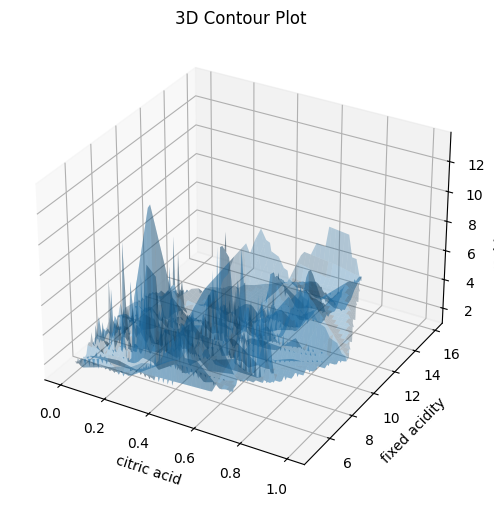

In [38]:
sns.kdeplot(data=wine_dataset, x="citric acid", y="fixed acidity", cmap="YlGnBu", fill=True)
plt.title('2D Density Plot for Column1 and Column2')
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')
plt.show()
!pip install scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citric acid' and 'fixed acidity' columns
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Surface Plot')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

# Assuming 'wine_dataset' is your DataFrame with 'citric acid' and 'fixed acidity' columns
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with a column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), len(x.unique()))
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the wireframe
wireframe = ax.plot_wireframe(xi, yi, zi, color='black')

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')  # Replace with appropriate label
ax.set_title('3D Wireframe Plot')

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'wine_dataset' is your DataFrame
x = wine_dataset['citric acid']
y = wine_dataset['fixed acidity']
z = wine_dataset['residual sugar']  # Replace with the column for z-axis values

# Creating grid coordinates for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating z values
zi = griddata((x, y), z, (xi, yi), method='linear')

# Creating the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting a 3D surface
surf = ax.plot_surface(xi, yi, zi, alpha=0.3)

# Overlaying contour plots at different z levels
levels = np.linspace(zi.min(), zi.max(), num=10)
for c in levels:
    ax.contour(xi, yi, zi, levels=[c], zdir='z', offset=c, alpha=0.5)

# Adding labels and title
ax.set_xlabel('citric acid')
ax.set_ylabel('fixed acidity')
ax.set_zlabel('residual sugar')
ax.set_title('3D Contour Plot')

plt.show()

<Axes: >

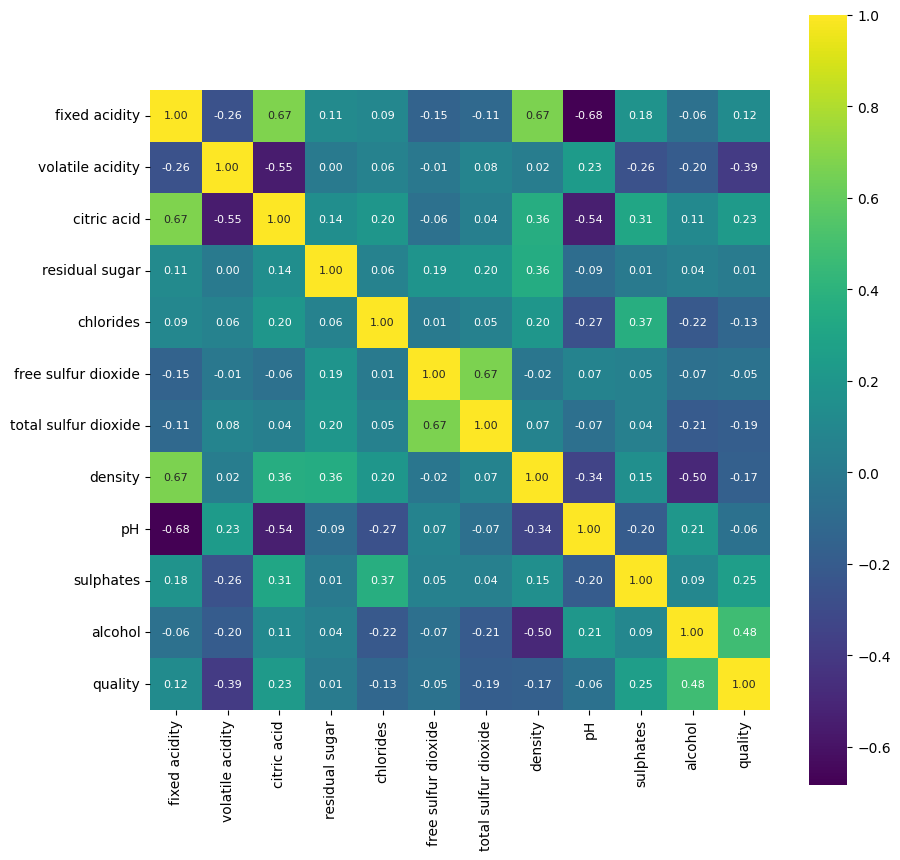

In [39]:
correlation = wine_dataset.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'viridis')

In [40]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [41]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [43]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [44]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.928125


In [47]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, Y_train)


GaussianNB()

In [48]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.85625


In [49]:
 pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\gaurav\appdata\roaming\python\python310\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Fit the model on the training data
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.665625


In [51]:
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes model
model = BernoulliNB()

# Fit the model on the training data
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.884375


In [52]:
from sklearn.tree import DecisionTreeClassifier

# For classification
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
# Fit the model on the training data
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.90625


In [53]:
from sklearn.ensemble import AdaBoostClassifier

# For classification
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


In [54]:
from sklearn.ensemble import ExtraTreesClassifier

# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.928125


In [55]:
from sklearn.tree import DecisionTreeRegressor

# For regression
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.928125


In [56]:
from sklearn.svm import SVC

# Create a Support Vector Classifier
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, Y_train)

# Now you can use svm_model to make predictions, for example:
# predictions = svm_model.predict(X_test)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [57]:
from sklearn.svm import SVR

# Create a Support Vector Regressor
svm_regressor = SVR()

# Fit the model on the training data
svm_regressor.fit(X_train, Y_train)

# Now you can use svm_regressor to make predictions, for example:
# predictions = svm_regressor.predict(X_test)

# Now you can use svm_model to make predictions, for example:
# predictions = svm_model.predict(X_test)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.928125


In [58]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, # Number of trees in the forest
                                       random_state=42)  # Random state for reproducibility

# Fit the model on the training data
rf_classifier.fit(X_train, Y_train)

# Now you can use rf_classifier to make predictions, for example:
# predictions = rf_classifier.predict(X_test)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, # Number of trees in the forest
                                     random_state=42)  # Random state for reproducibility

# Fit the model on the training data
rf_regressor.fit(X_train, Y_train)

# Now you can use rf_regressor to make predictions, for example:
# predictions = rf_regressor.predict(X_test)
# For classification
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors Classifier
# n_neighbors is the number of neighbors to use
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, Y_train)

# Now you can use knn_classifier to make predictions, for example:
# predictions = knn_classifier.predict(X_test)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


In [61]:
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors Regressor
# n_neighbors is the number of neighbors to use
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, Y_train)

# Now you can use knn_regressor to make predictions, for example:
# predictions = knn_regressor.predict(X_test)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


In [62]:
from sklearn.cluster import KMeans

# Train K-means on the training data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Assign clusters to the test data based on these trained centroids
test_clusters = kmeans.predict(X_test)
from sklearn.metrics import silhouette_score

# Calculate silhouette score on the test data
silhouette = silhouette_score(X_test, test_clusters)
print(f"Silhouette Score on Test Data: {silhouette}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score on Test Data: 0.5114402037752896


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 1.499082238952804e-29
R-squared Score: 1.0


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
# Make predictions on the test set
Y_test_prediction = log_reg.predict(X_test)

# Calculate accuracy on test data
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)
print('Accuracy:', test_data_accuracy)


Accuracy: 0.884375


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
!pip install tensorflow



Defaulting to user installation because normal site-packages is not writeable


In [66]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a simple Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # One output node for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/10
40/40 [==============================] - 2s 5ms/step - loss: 13.1737
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 1.4913
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.6227
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3893
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 0.1557
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0768
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 8/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 10/10
10/10 [==============================] - 0s 3ms/step
Mean Squared Error: 0.016917696763181323


In [67]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")


Epoch 1/20


40/40 [==============================] - 2s 5ms/step - loss: 0.7106
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0397
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 8/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 9/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 10/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 11/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 12/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 13/20
40/40 [==============================] - 0s 3ms/

In [68]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/30
40/40 [==============================] - 2s 3ms/step - loss: 0.9399
Epoch 2/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0327
Epoch 3/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 4/30
40/40 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 5/30
40/40 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 6/30
40/40 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 7/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 8/30
40/40 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 9/30
40/40 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 10/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 11/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 12/30
40/40 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 13/30
40/40 [==============================

In [69]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=40, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")


Epoch 1/40


40/40 [==============================] - 1s 3ms/step - loss: 0.4647
Epoch 2/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 3/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 4/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 5/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 6/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 7/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 8/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 9/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 10/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 11/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 12/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 13/40
40/40 [==============================] - 0s 4ms/

In [70]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/50


40/40 [==============================] - 1s 5ms/step - loss: 0.4189
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 11/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 12/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 13/50
40/40 [==============================] - 0s 3ms/

In [71]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=60, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/60
40/40 [==============================] - 1s 3ms/step - loss: 0.2375
Epoch 2/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 3/60
40/40 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 4/60
40/40 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 5/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 6/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 7/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 8/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 9/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 10/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 11/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 12/60
40/40 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 13/60
40/40 [==============================

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=70, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/70


40/40 [==============================] - 2s 3ms/step - loss: 0.3188
Epoch 2/70
40/40 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 3/70
40/40 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 4/70
40/40 [==============================] - 0s 3ms/step - loss: 6.0826e-04
Epoch 5/70
40/40 [==============================] - 0s 3ms/step - loss: 6.5671e-04
Epoch 6/70
40/40 [==============================] - 0s 3ms/step - loss: 5.7785e-04
Epoch 7/70
40/40 [==============================] - 0s 4ms/step - loss: 5.3567e-04
Epoch 8/70
40/40 [==============================] - 0s 5ms/step - loss: 5.1668e-04
Epoch 9/70
40/40 [==============================] - 0s 3ms/step - loss: 5.4996e-04
Epoch 10/70
40/40 [==============================] - 0s 3ms/step - loss: 5.7781e-04
Epoch 11/70
40/40 [==============================] - 0s 3ms/step - loss: 4.6679e-04
Epoch 12/70
40/40 [==============================] - 0s 3ms/step - loss: 5.5621e-04
Epoch 13/70
40/40 [=====

In [73]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=80, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/80


40/40 [==============================] - 1s 5ms/step - loss: 0.2231
Epoch 2/80
40/40 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 3/80
40/40 [==============================] - 0s 3ms/step - loss: 6.9150e-04
Epoch 4/80
40/40 [==============================] - 0s 3ms/step - loss: 3.6659e-04
Epoch 5/80
40/40 [==============================] - 0s 4ms/step - loss: 3.4559e-04
Epoch 6/80
40/40 [==============================] - 0s 3ms/step - loss: 3.0108e-04
Epoch 7/80
40/40 [==============================] - 0s 4ms/step - loss: 3.2150e-04
Epoch 8/80
40/40 [==============================] - 0s 5ms/step - loss: 3.7963e-04
Epoch 9/80
40/40 [==============================] - 0s 4ms/step - loss: 2.7891e-04
Epoch 10/80
40/40 [==============================] - 0s 4ms/step - loss: 3.0106e-04
Epoch 11/80
40/40 [==============================] - 0s 4ms/step - loss: 2.8090e-04
Epoch 12/80
40/40 [==============================] - 0s 4ms/step - loss: 3.4679e-04
Epoch 13/80
40/40 [=

In [74]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=90, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/90
40/40 [==============================] - 2s 3ms/step - loss: 0.1269
Epoch 2/90
40/40 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 3/90
40/40 [==============================] - 0s 3ms/step - loss: 4.0230e-04
Epoch 4/90
40/40 [==============================] - 0s 3ms/step - loss: 4.6057e-04
Epoch 5/90
40/40 [==============================] - 0s 2ms/step - loss: 2.9572e-04
Epoch 6/90
40/40 [==============================] - 0s 3ms/step - loss: 3.3187e-04
Epoch 7/90
40/40 [==============================] - 0s 4ms/step - loss: 2.7162e-04
Epoch 8/90
40/40 [==============================] - 0s 3ms/step - loss: 3.2326e-04
Epoch 9/90
40/40 [==============================] - 0s 3ms/step - loss: 3.3244e-04
Epoch 10/90
40/40 [==============================] - 0s 4ms/step - loss: 5.3640e-04
Epoch 11/90
40/40 [==============================] - 0s 4ms/step - loss: 2.3691e-04
Epoch 12/90
40/40 [==============================] - 0s 4ms/step - loss: 2.4221e-04
Epoch 13/

In [75]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/100
40/40 [==============================] - 1s 3ms/step - loss: 0.1152
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 1.6238e-04
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 1.4437e-04
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 1.3424e-04
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 1.2876e-04
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 1.2849e-04
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 1.2442e-04
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1656e-04
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 1.1229e-04
Epoch 11/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4422e-04
Epoch 12/100
40/40 [==============================] - 0s 5ms/step - loss: 1.1697e-

In [76]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=110, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/110


40/40 [==============================] - 1s 4ms/step - loss: 0.1230
Epoch 2/110
40/40 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 3/110
40/40 [==============================] - 0s 3ms/step - loss: 2.5842e-04
Epoch 4/110
40/40 [==============================] - 0s 3ms/step - loss: 1.3822e-04
Epoch 5/110
40/40 [==============================] - 0s 3ms/step - loss: 1.2095e-04
Epoch 6/110
40/40 [==============================] - 0s 3ms/step - loss: 1.1646e-04
Epoch 7/110
40/40 [==============================] - 0s 3ms/step - loss: 1.2436e-04
Epoch 8/110
40/40 [==============================] - 0s 5ms/step - loss: 1.0651e-04
Epoch 9/110
40/40 [==============================] - 0s 3ms/step - loss: 1.0007e-04
Epoch 10/110
40/40 [==============================] - 0s 7ms/step - loss: 1.1687e-04
Epoch 11/110
40/40 [==============================] - 0s 5ms/step - loss: 9.6011e-05
Epoch 12/110
40/40 [==============================] - 0s 6ms/step - loss: 9.5113e-05
Epoch 13/

In [77]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=120, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/120


40/40 [==============================] - 1s 4ms/step - loss: 0.0798
Epoch 2/120
40/40 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 3/120
40/40 [==============================] - 0s 3ms/step - loss: 9.4029e-05
Epoch 4/120
40/40 [==============================] - 0s 4ms/step - loss: 7.0075e-05
Epoch 5/120
40/40 [==============================] - 0s 3ms/step - loss: 6.2249e-05
Epoch 6/120
40/40 [==============================] - 0s 5ms/step - loss: 6.6895e-05
Epoch 7/120
40/40 [==============================] - 0s 4ms/step - loss: 5.8764e-05
Epoch 8/120
40/40 [==============================] - 0s 4ms/step - loss: 5.6937e-05
Epoch 9/120
40/40 [==============================] - 0s 4ms/step - loss: 6.1128e-05
Epoch 10/120
40/40 [==============================] - 0s 4ms/step - loss: 5.6154e-05
Epoch 11/120
40/40 [==============================] - 0s 4ms/step - loss: 5.8039e-05
Epoch 12/120
40/40 [==============================] - 0s 4ms/step - loss: 5.3453e-05
Epoch 13/

In [78]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=130, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/130
40/40 [==============================] - 2s 5ms/step - loss: 0.0331
Epoch 2/130
40/40 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 3/130
40/40 [==============================] - 0s 3ms/step - loss: 1.8968e-04
Epoch 4/130
40/40 [==============================] - 0s 3ms/step - loss: 5.3458e-05
Epoch 5/130
40/40 [==============================] - 0s 4ms/step - loss: 8.3292e-05
Epoch 6/130
40/40 [==============================] - 0s 4ms/step - loss: 7.2307e-05
Epoch 7/130
40/40 [==============================] - 0s 4ms/step - loss: 6.9731e-05
Epoch 8/130
40/40 [==============================] - 0s 5ms/step - loss: 6.2577e-05
Epoch 9/130
40/40 [==============================] - 0s 7ms/step - loss: 6.1419e-05
Epoch 10/130
40/40 [==============================] - 0s 3ms/step - loss: 5.1846e-05
Epoch 11/130
40/40 [==============================] - 0s 5ms/step - loss: 5.1541e-05
Epoch 12/130
40/40 [==============================] - 0s 5ms/step - loss: 8.9049e-

In [79]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=140, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/140
40/40 [==============================] - 5s 4ms/step - loss: 0.0606
Epoch 2/140
40/40 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 3/140
40/40 [==============================] - 0s 5ms/step - loss: 7.7827e-05
Epoch 4/140
40/40 [==============================] - 0s 3ms/step - loss: 3.5984e-05
Epoch 5/140
40/40 [==============================] - 0s 3ms/step - loss: 4.3407e-05
Epoch 6/140
40/40 [==============================] - 0s 5ms/step - loss: 3.2547e-05
Epoch 7/140
40/40 [==============================] - 0s 5ms/step - loss: 2.8573e-05
Epoch 8/140
40/40 [==============================] - 0s 4ms/step - loss: 2.6155e-05
Epoch 9/140
40/40 [==============================] - 0s 3ms/step - loss: 2.6653e-05
Epoch 10/140
40/40 [==============================] - 0s 3ms/step - loss: 2.7973e-05
Epoch 11/140
40/40 [==============================] - 0s 3ms/step - loss: 2.4593e-05
Epoch 12/140
40/40 [==============================] - 0s 3ms/step - loss: 2.6346e-

In [80]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=170, batch_size=32)
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Epoch 1/170


40/40 [==============================] - 1s 5ms/step - loss: 0.0703
Epoch 2/170
40/40 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 3/170
40/40 [==============================] - 0s 3ms/step - loss: 1.2628e-04
Epoch 4/170
40/40 [==============================] - 0s 3ms/step - loss: 4.0153e-05
Epoch 5/170
40/40 [==============================] - 0s 4ms/step - loss: 3.1182e-05
Epoch 6/170
40/40 [==============================] - 0s 4ms/step - loss: 2.4843e-05
Epoch 7/170
40/40 [==============================] - 0s 5ms/step - loss: 2.0560e-05
Epoch 8/170
40/40 [==============================] - 0s 4ms/step - loss: 2.2427e-05
Epoch 9/170
40/40 [==============================] - 0s 4ms/step - loss: 2.1328e-05
Epoch 10/170
40/40 [==============================] - 0s 4ms/step - loss: 1.8340e-05
Epoch 11/170
40/40 [==============================] - 0s 4ms/step - loss: 2.0157e-05
Epoch 12/170
40/40 [==============================] - 0s 4ms/step - loss: 1.7376e-05
Epoch 13/

In [81]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Create the Lasso Regression model
# alpha is the regularization strength; you might need to tune this
lasso_reg = Lasso(alpha=0.01)  # start with a small alpha, like 0.01, and adjust as needed

# Train the model
lasso_reg.fit(X_train, y_train)
# Make predictions on the test set
y_test_pred = lasso_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.709900437292938e-05


In [82]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Create the Ridge Regression model
ridge_reg = Ridge(alpha=0.01)  # start with a small alpha, like 0.01, and adjust as needed

# Train the model
ridge_reg.fit(X_train, y_train)
# Make predictions on the test set
y_test_pred = ridge_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.322923779740248e-11


In [83]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import numpy as np
# Create and fit the MeanShift model
meanshift = MeanShift(bandwidth=10)  # Bandwidth is a hyperparameter; you might need to adjust it
meanshift.fit(X)
# Cluster centers
centers = meanshift.cluster_centers_
print("Cluster Centers:", centers)

# Predict cluster labels for the data points
labels = meanshift.labels_
# Assuming you have some ground truth labels to compare against
ground_truth_labels = np.array([...])  # Replace with your actual labels

# Silhouette Score
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

Cluster Centers: [[8.72307692e+00 5.17079002e-01 2.94553015e-01 2.42837838e+00
  8.58149688e-02 6.85446985e+00 1.72016632e+01 9.96715322e-01
  3.29311850e+00 6.52910603e-01 1.06304574e+01]
 [7.70000000e+00 6.20921053e-01 2.32105263e-01 2.41447368e+00
  8.67894737e-02 1.79605263e+01 8.84736842e+01 9.96865789e-01
  3.35434211e+00 6.18947368e-01 9.99649123e+00]
 [8.07741935e+00 5.57580645e-01 2.85000000e-01 2.47258065e+00
  9.35000000e-02 1.82258065e+01 7.69516129e+01 9.97233871e-01
  3.33112903e+00 6.38064516e-01 9.99193548e+00]
 [7.71458333e+00 5.80312500e-01 2.60208333e-01 2.74583333e+00
  8.84583333e-02 1.76875000e+01 1.02895833e+02 9.96741875e-01
  3.30291667e+00 6.50208333e-01 1.00284722e+01]
 [8.10937500e+00 5.65625000e-01 2.92812500e-01 2.69687500e+00
  8.79375000e-02 2.15937500e+01 1.14000000e+02 9.97229375e-01
  3.24875000e+00 6.69062500e-01 9.63750000e+00]
 [8.16333333e+00 5.27166667e-01 2.84000000e-01 2.82500000e+00
  7.94666667e-02 3.09333333e+01 1.01600000e+02 9.96379333e-01

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
# Create and fit the DBSCAN model
# eps and min_samples are hyperparameters; you might need to adjust them
dbscan = DBSCAN(eps=0.9, min_samples=5)  # Example values; adjust as needed
dbscan.fit(X)
# Cluster labels
labels = dbscan.labels_

# Identify core samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Number of clusters (excluding noise)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of clusters: {n_clusters_}")
# Cluster labels
labels = dbscan.labels_

# Silhouette Score, excluding noise if present
if n_clusters_ > 1:
    silhouette = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score not applicable for a single cluster.")

Estimated number of clusters: 2
Silhouette Score: -0.5057672289689639


In [85]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# Create and fit the Agglomerative Hierarchical model
# The number of clusters can be set, or you can let the algorithm determine it naturally
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Example: specifying 2 clusters
agg_clustering.fit(X)
# Cluster labels
labels = agg_clustering.labels_
# Silhouette Score
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.41101924183058636


In [86]:
import numpy as np
import random

# Parameters
gamma = 0.75  # Discount factor
alpha = 0.9   # Learning rate
num_episodes = 1000
num_states = 5    # Example number of states
num_actions = 2   # Example number of actions

# Initialize Q-table randomly
Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

# Dummy environment response for demonstration (to be replaced with actual environment logic)
# It should return a new state and a reward given a state and an action
def step(state, action):
    new_state = np.random.randint(0, num_states)
    reward = np.random.random()
    return new_state, reward

# Q-learning algorithm
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)  # Start at a random state

    while True:
        # Choose an action (either random for exploration, or use the current Q-table)
        if random.uniform(0, 1) < 0.1:  # Exploration factor
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(Q[state, :])

        # Take the action, and observe the new state and reward
        new_state, reward = step(state, action)

        # Update Q-table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Update state
        state = new_state

        # Break if end of episode (to be defined according to your environment)
        if ...:  # Add a condition to break the loop when the episode ends
            break

print("Q-table:")
print(Q)


Q-table:
[[1.62054082 2.07251973]
 [1.69657621 1.33337572]
 [1.44792601 1.82791912]
 [1.4240555  1.82640996]
 [1.45090344 1.9833998 ]]


In [87]:
import numpy as np
import random

# Parameters
gamma = 0.75  # Discount factor
alpha = 0.9   # Learning rate
num_episodes = 1000
num_states = 5    # Example number of states
num_actions = 2   # Example number of actions

# Initialize Q-table randomly
Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

# Dummy environment response for demonstration (replace with your environment)
def step(state, action):
    new_state = np.random.randint(0, num_states)
    reward = np.random.random()  # Random reward
    return new_state, reward

# Q-learning algorithm with cumulative reward tracking
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)  # Start at a random state
    total_reward = 0  # Reset total reward for each episode

    while True:
        # Choose an action using an epsilon-greedy strategy
        if random.uniform(0, 1) < 0.1:  # Exploration factor
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(Q[state, :])

        # Take the action, and observe the new state and reward
        new_state, reward = step(state, action)

        # Update the Q-table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Update total reward
        total_reward += reward

        # Update state
        state = new_state

        # Break if end of episode (this depends on your specific environment)
        if ...:  # Add condition to break the loop
            break

    # Print total reward at the end of each episode
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

print("Final Q-table:")
print(Q)


Episode 1: Total Reward = 0.1947142713321124
Episode 2: Total Reward = 0.08259963701505413
Episode 3: Total Reward = 0.39132589276593976
Episode 4: Total Reward = 0.20390851517658626
Episode 5: Total Reward = 0.5081990345301797
Episode 6: Total Reward = 0.9054502619023597
Episode 7: Total Reward = 0.1881577954087058
Episode 8: Total Reward = 0.9749617981742019
Episode 9: Total Reward = 0.4366212717068825
Episode 10: Total Reward = 0.13841688608263591
Episode 11: Total Reward = 0.9402099522656041
Episode 12: Total Reward = 0.3981975108561576
Episode 13: Total Reward = 0.36213804704987484
Episode 14: Total Reward = 0.5052327503197982
Episode 15: Total Reward = 0.3350706388795741
Episode 16: Total Reward = 0.9316352514074172
Episode 17: Total Reward = 0.25449087581245555
Episode 18: Total Reward = 0.7779360462350846
Episode 19: Total Reward = 0.5554199035317885
Episode 20: Total Reward = 0.48406299566350497
Episode 21: Total Reward = 0.6352825477323727
Episode 22: Total Reward = 0.7911077

In [88]:
import numpy as np
import random

# Environment parameters
num_states = 5
num_actions = 2

# R-learning parameters
alpha = 0.5  # Learning rate
beta = 0.01  # Learning rate for average reward
num_episodes = 1000
epsilon = 0.1  # Exploration rate

# Initialize R-table and average reward
R = np.zeros((num_states, num_actions))
rho = 0  # Average reward

# Dummy environment (replace with your environment)
def step(state, action):
    new_state = np.random.randint(0, num_states)
    reward = np.random.rand()
    return new_state, reward

# R-learning algorithm
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)

    while True:  # Replace with your episode ending condition
        # Choose action (epsilon-greedy strategy)
        if random.random() < epsilon:
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(R[state, :] + rho)

        # Take action and observe new state and reward
        new_state, reward = step(state, action)

        # Update R-table
        next_max = np.max(R[new_state, :])
        R[state, action] += alpha * (reward - rho + next_max - R[state, action])

        # Update average reward
        rho += beta * (reward - rho + next_max - np.max(R[state, :]))

        # Move to the new state
        state = new_state

        # Check for end of episode (add your condition)
        if ...:
            break

# Display final R-table
print("Final R-table:")
print(R)


Final R-table:
[[9.75860579 8.78331961]
 [9.01145459 9.96256772]
 [9.90170153 6.67816497]
 [9.19118372 9.58450157]
 [9.2736343  9.8636694 ]]


In [89]:
import numpy as np
import random

# Environment and R-learning parameters
num_states = 5
num_actions = 2
alpha = 0.5  # Learning rate for R-table
beta = 0.01  # Learning rate for average reward
num_episodes = 1000
epsilon = 0.1  # Exploration rate

# Initialize R-table and average reward
R = np.zeros((num_states, num_actions))
rho = 0  # Average reward

# Dummy environment (replace with your environment)
def step(state, action):
    new_state = np.random.randint(0, num_states)
    reward = np.random.rand()
    return new_state, reward

# R-learning algorithm with cumulative reward tracking
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)
    total_reward = 0  # Initialize total reward for the episode

    while True:  # Add your episode ending condition here
        # Choose an action (epsilon-greedy strategy)
        if random.random() < epsilon:
            action = np.random.randint(0, num_actions)
        else:
            action = np.argmax(R[state, :])

        # Take action and observe the new state and reward
        new_state, reward = step(state, action)
        total_reward += reward  # Accumulate the reward

        # Update R-table
        next_max = np.max(R[new_state, :])
        R[state, action] += alpha * (reward - rho + next_max - R[state, action])

        # Update average reward
        rho += beta * (reward - rho + next_max - np.max(R[state, :]))

        # Transition to the new state
        state = new_state

        # Your condition to end the episode
        if ...:
            break

    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Display final R-table
print("Final R-table:")
print(R)


Episode 1: Total Reward = 0.8462417586589899
Episode 2: Total Reward = 0.20172736694781035
Episode 3: Total Reward = 0.08947942893097782
Episode 4: Total Reward = 0.7067205482933687
Episode 5: Total Reward = 0.711155536380698
Episode 6: Total Reward = 0.8271200997285534
Episode 7: Total Reward = 0.4775132785522843
Episode 8: Total Reward = 0.24102054088270963
Episode 9: Total Reward = 0.22116453459210272
Episode 10: Total Reward = 0.15518986199463736
Episode 11: Total Reward = 0.29610613045026635
Episode 12: Total Reward = 0.7884685949098289
Episode 13: Total Reward = 0.5675828290277014
Episode 14: Total Reward = 0.22315791822684516
Episode 15: Total Reward = 0.8324149873323176
Episode 16: Total Reward = 0.13305814722539788
Episode 17: Total Reward = 0.22232652629805427
Episode 18: Total Reward = 0.11484758161871123
Episode 19: Total Reward = 0.02632265938855516
Episode 20: Total Reward = 0.7168554845255416
Episode 21: Total Reward = 0.42064819552069876
Episode 22: Total Reward = 0.430

In [90]:
import numpy as np
import random

# Parameters
num_states = 5  # Number of states
num_episodes = 1000  # Number of episodes
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

# Initialize value function arbitrarily for all states
V = np.zeros(num_states)

# Example environment: rewards and transition probabilities
# For a more complex environment, you would replace these with dynamic responses
rewards = np.random.rand(num_states)  # Random rewards for this example
transitions = np.random.randint(num_states, size=num_states)  # Random transitions

# TD(0) Learning Algorithm
for episode in range(num_episodes):
    state = np.random.randint(num_states)  # Start from a random state

    while True:  # Add your own condition for breaking the episode
        # Randomly choosing next state for simplicity
        next_state = transitions[state]

        # TD Update
        reward = rewards[state]
        V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])

        state = next_state

        # Break if at terminal state or end of episode
        if ...:  # Add a condition to break the loop
            break

# Display final value function
print("Final value function:")
print(V)


Final value function:
[1.16346794 4.81873898 4.84839611 5.23195926 4.79345395]


In [91]:
import numpy as np
import random

# Environment and TD Learning parameters
num_states = 5
alpha = 0.1
gamma = 0.9
num_episodes = 1000

# Initialize value function
V = np.zeros(num_states)

# Example rewards and transitions (replace with your environment logic)
rewards = np.random.rand(num_states)  # Example rewards
transitions = np.random.randint(num_states, size=num_states)  # Example transitions

# TD Learning
for episode in range(num_episodes):
    state = np.random.randint(num_states)
    total_reward = 0  # Initialize total reward for the episode

    while True:  # Replace with your episode ending condition
        next_state = transitions[state]
        reward = rewards[state]
        total_reward += reward  # Accumulate the reward

        # TD Update
        V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])

        state = next_state

        if ...:  # Your condition to end the episode
            break

    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Display final value function
print("Final value function:")
print(V)


Episode 1: Total Reward = 0.21601371893269972
Episode 2: Total Reward = 0.8394987877997615
Episode 3: Total Reward = 0.5801306478915328
Episode 4: Total Reward = 0.7351466317068784
Episode 5: Total Reward = 0.7351466317068784
Episode 6: Total Reward = 0.5801306478915328
Episode 7: Total Reward = 0.21601371893269972
Episode 8: Total Reward = 0.8394987877997615
Episode 9: Total Reward = 0.8361346945213316
Episode 10: Total Reward = 0.8394987877997615
Episode 11: Total Reward = 0.8394987877997615
Episode 12: Total Reward = 0.21601371893269972
Episode 13: Total Reward = 0.8394987877997615
Episode 14: Total Reward = 0.8394987877997615
Episode 15: Total Reward = 0.8394987877997615
Episode 16: Total Reward = 0.7351466317068784
Episode 17: Total Reward = 0.8361346945213316
Episode 18: Total Reward = 0.5801306478915328
Episode 19: Total Reward = 0.7351466317068784
Episode 20: Total Reward = 0.5801306478915328
Episode 21: Total Reward = 0.8394987877997615
Episode 22: Total Reward = 0.83949878779

In [92]:
import numpy as np
import random

# Environment and TD Learning parameters
num_states = 5
alpha = 0.1
gamma = 0.9
num_episodes = 1000

# Initialize value function
V = np.zeros(num_states)

# Example rewards and transitions (replace with your environment logic)
rewards = np.random.rand(num_states)  # Example rewards
transitions = np.random.randint(num_states, size=num_states)  # Example transitions

# Accumulator for total rewards
total_rewards = 0

# TD Learning
for episode in range(num_episodes):
    state = np.random.randint(num_states)
    episode_reward = 0  # Initialize reward for the current episode

    while True:  # Replace with your episode ending condition
        next_state = transitions[state]
        reward = rewards[state]
        episode_reward += reward  # Accumulate the reward for the episode

        # TD Update
        V[state] = V[state] + alpha * (reward + gamma * V[next_state] - V[state])

        state = next_state

        if ...:  # Your condition to end the episode
            break

    total_rewards += episode_reward  # Accumulate total rewards over all episodes

# Calculate mean reward
mean_reward = total_rewards / num_episodes
print(f"Mean Reward over {num_episodes} episodes: {mean_reward}")

# Display final value function
print("Final value function:")
print(V)


Mean Reward over 1000 episodes: 0.6497309122665329
Final value function:
[4.48820767 4.65877857 4.82717537 4.65455216 5.01411141]


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training sets
rf_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error or any other suitable metric for regression
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0005123229166666614


In [94]:
import sklearn
print(sklearn.__version__)


1.2.2


In [95]:
import sklearn
print(sklearn.__version__)

1.2.2


In [96]:
 pip show scikit-learn 

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\gaurav\appdata\roaming\python\python310\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [97]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with Decision Trees as base estimators
bagging_regressor = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

# Train the model using the training sets
bagging_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagging_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.0006639104166666446


In [98]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an Extra Trees Regressor
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model using the training sets
et_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = et_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00019203333333332417


In [99]:
print(y[:10])  # Print first few labels to inspect them
print(set(y))  # Print unique values to see the range of classes
# Example conversion if `y` is continuous but represents categorical classes
y = y.astype(int)  # Converting to integer if it makes sense for your data

# Assuming X and y are now correctly formatted for classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = et_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
5     7.4
6     7.9
7     7.3
8     7.8
9     7.5
Name: fixed acidity, dtype: float64
{4.6, 5.6, 6.3, 7.1, 6.7, 7.9, 10.5, 7.3, 7.8, 7.4, 11.2, 7.5, 8.9, 8.5, 10.2, 10.1, 11.5, 12.8, 15.0, 14.0, 15.6, 5.0, 5.5, 6.5, 6.0, 7.0, 8.0, 9.0, 9.5, 10.0, 11.0, 12.0, 12.5, 13.5, 13.0, 15.5, 4.9, 5.4, 5.9, 6.9, 6.4, 8.4, 9.9, 9.4, 10.4, 10.9, 11.4, 11.9, 12.4, 12.9, 13.4, 15.9, 5.8, 5.3, 6.8, 8.3, 8.8, 8.7, 8.2, 9.3, 9.7, 9.2, 9.8, 10.7, 10.8, 10.3, 11.8, 11.3, 11.7, 12.2, 12.7, 12.3, 13.3, 13.8, 13.7, 13.2, 14.3, 4.7, 5.2, 5.7, 6.2, 7.7, 7.2, 5.1, 6.6, 6.1, 7.6, 8.1, 8.6, 9.6, 9.1, 10.6, 11.6, 11.1, 12.6, 12.1}


Accuracy: 0.9208333333333333


In [100]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your entire dataset features and labels respectively

# Create an Extra Trees Classifier
et_classifier = ExtraTreesClassifier(n_estimators=25, random_state=42)

# Train the model using the entire dataset
et_classifier.fit(X, y)

# Predict the responses for the dataset
y_pred = et_classifier.predict(X)

# Calculate accuracy on the same data used for training
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on training data: {accuracy}")


Accuracy on training data: 1.0


In [101]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your dataset features and labels respectively
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier with Decision Trees as the base estimator
bagged_trees = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Train the model using the training sets
bagged_trees.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagged_trees.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9958333333333333


In [102]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with Decision Trees as the base estimator
bagged_trees_regressor = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

# Train the model using the training sets
bagged_trees_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagged_trees_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.003121666666666666


In [103]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your dataset features and labels respectively for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier with SVC as the base estimator
bagging_svc_classifier = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=10,
    random_state=42
)

# Train the model using the training sets
bagging_svc_classifier.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagging_svc_classifier.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.30416666666666664


In [104]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels respectively for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with SVR as the base estimator
bagging_svr_regressor = BaggingRegressor(
    base_estimator=SVR(),
    n_estimators=10,
    random_state=42
)

# Train the model using the training sets
bagging_svr_regressor.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = bagging_svr_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.6523604348142106


In [105]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your dataset features and continuous labels for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base learners
base_learners_reg = [
    LinearRegression(),
    KNeighborsRegressor(),
    SVR()
]

# Create and train bagging ensembles with different base learners
bagging_models_reg = [BaggingRegressor(base_estimator=base_learner, n_estimators=10, random_state=42) for base_learner in base_learners_reg]
for model in bagging_models_reg:
    model.fit(X_train, y_train)

# Predict and evaluate each model
for model in bagging_models_reg:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error with {type(model.base_estimator).__name__}: {mse}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error with LinearRegression: 0.08622532614054863
Mean Squared Error with KNeighborsRegressor: 0.8099841666666667
Mean Squared Error with SVR: 0.6523604348142106


In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your dataset features and categorical labels for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base learners
base_learners_cls = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC()
]

# Create and train bagging ensembles with different base learners
bagging_models_cls = [BaggingClassifier(base_estimator=base_learner, n_estimators=10, random_state=42) for base_learner in base_learners_cls]
for model in bagging_models_cls:
    model.fit(X_train, y_train)

# Predict and evaluate each model
for model in bagging_models_cls:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {type(model.base_estimator).__name__}: {accuracy}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Accuracy with LogisticRegression: 0.5354166666666667
Accuracy with KNeighborsClassifier: 0.5
Accuracy with SVC: 0.30416666666666664


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a sample multiclass classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create multiple multinomial logistic regression models
models = [LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42) for _ in range(5)]

# Train each model
for model in models:
    model.fit(X_train, y_train)

# Aggregate predictions from each model (example: majority voting)
predictions = np.array([model.predict(X_test) for model in models])
final_prediction = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

# Evaluate the aggregated model
accuracy = accuracy_score(y_test, final_prediction)
print(f"Accuracy: {accuracy}")


Accuracy: 0.64


In [108]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample multiclass classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with a Decision Tree as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # weak learner
    n_estimators=50,  # number of weak learners to train
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample multiclass classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Logistic Regression as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=LogisticRegression(),
    n_estimators=50,  # number of estimators to train
    random_state=42,
    algorithm='SAMME'  # algorithm to use (SAMME is used for discrete outputs)
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.5633333333333334
Accuracy: 0.5666666666666667


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [109]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with Linear Regression as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=LinearRegression(),
    n_estimators=50,  # number of regressors to train
    random_state=42,
    loss='linear'  # loss function to use when updating weights
)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 4.3868537485792936e-26


In [110]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=40, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with Decision Tree Regression as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(),
    random_state=42,
    loss='square'
)

# Define a grid of hyperparameters to search
param_dist = {
    'base_estimator__max_depth': [400, 200, 300, 300],
    'n_estimators': [50, 100, 200],
    'learning_rate': [2.0, 2.0, 1.0, 2.0]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(ada_reg, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=None, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding MSE
print("Best parameters:", random_search.best_params_)
best_mse = -random_search.best_score_
print(f"Best Mean Squared Error (CV): {best_mse}")

# Use the best estimator to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estima

Best parameters: {'n_estimators': 100, 'learning_rate': 1.0, 'base_estimator__max_depth': 300}
Best Mean Squared Error (CV): 959.3960693045498
Test Mean Squared Error: 652.9174536282604


In [111]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=100, n_features=50, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with Decision Tree Regression as the base learner
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'base_estimator__max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ada_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=None)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding MSE
print("Best parameters:", grid_search.best_params_)
best_mse = -grid_search.best_score_
print(f"Best Mean Squared Error (CV): {best_mse}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estima

Best parameters: {'base_estimator__max_depth': 10, 'learning_rate': 1, 'n_estimators': 50}
Best Mean Squared Error (CV): 1052.9056103194303
Test Mean Squared Error: 1274.4557284906743


In [112]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=10000, n_features=90, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with Decision Tree Regression as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=10),  # Using a Decision Tree as the base regressor
    n_estimators=100,  # Number of regressors to train
    random_state=42,
    loss='square'  # Loss function for updating weights, 'square' is commonly used for regression
)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 52.432322017107005


In [113]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=4, random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with KNN as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=KNeighborsRegressor(),
    n_estimators=50,  # number of regressors to train
    random_state=42,
    loss='square'  # loss function for updating weights
)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 7620.678644206977


In [114]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=2, noise=20, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Create an AdaBoost regressor with a Decision Tree as the base learner
ada_reg = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    random_state=42
)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 469.4703812921985


In [115]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to create a simple neural network
def create_nn():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# AdaBoost with Neural Networks
n_estimators = 10
learning_rate = 0.01

# Initialize weights
sample_weights = np.ones(X_train.shape[0]) / X_train.shape[0]

# Store models and their predictions
models = []
predictions = np.zeros((X_test.shape[0], n_estimators))

for i in range(n_estimators):
    # Train a neural network on the weighted data
    model = create_nn()
    model.fit(X_train, y_train, sample_weight=sample_weights, epochs=10, verbose=0)
    models.append(model)

    # Make predictions and update sample weights
    y_pred = model.predict(X_train).flatten()
    residuals = np.abs(y_train - y_pred)
    max_residual = np.max(residuals)
    residuals /= max_residual  # Normalize
    sample_weights *= np.exp(learning_rate * residuals)
    sample_weights /= np.sum(sample_weights)  # Normalize weights

    # Store predictions for test data
    predictions[:, i] = model.predict(X_test).flatten()

# Final prediction is the average of individual predictions
final_prediction = np.mean(predictions, axis=1)

# Evaluate the model
mse = mean_squared_error(y_test, final_prediction)
print(f"Mean Squared Error: {mse}")


10/10 [==============================] - 0s 2ms/step
Mean Squared Error: 35533.96910315788


In [116]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.base import clone

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class CustomAdaBoostRegressor:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        sample_weight = np.ones(X.shape[0]) / X.shape[0]
        for _ in range(self.n_estimators):
            model = clone(self.base_estimator)
            model.fit(X, y, sample_weight)
            y_pred = model.predict(X)
            residuals = np.abs(y - y_pred)
            max_residual = np.max(residuals)
            residuals /= max_residual  # Normalize
            sample_weight *= np.exp(residuals)
            sample_weight /= np.sum(sample_weight)  # Normalize weights
            self.models.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=0)

# Initialize and train Custom AdaBoost with Bayesian Ridge Regressor
ada_bayes = CustomAdaBoostRegressor(BayesianRidge(), n_estimators=10)
ada_bayes.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = ada_bayes.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.745125758759843e-20


In [117]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class CustomAdaBoostRidge:
    def __init__(self, n_estimators=10, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        residuals = np.copy(y)
        for _ in range(self.n_estimators):
            model = Ridge()
            model.fit(X, residuals)
            self.models.append(model)
            predictions = model.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        predictions = np.sum([model.predict(X) for model in self.models], axis=0)
        return predictions / self.n_estimators

# Initialize and train custom AdaBoost with Ridge Regression
custom_ada_ridge = CustomAdaBoostRidge(n_estimators=10, learning_rate=0.5)
custom_ada_ridge.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = custom_ada_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 24438.201325897415


In [118]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class CustomAdaBoostWithLasso:
    def __init__(self, n_estimators=10, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        residuals = np.copy(y)
        for _ in range(self.n_estimators):
            model = Lasso(alpha=0.1)
            model.fit(X, residuals)
            self.models.append(model)
            predictions = model.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        predictions = np.sum([model.predict(X) for model in self.models], axis=0)
        return predictions / self.n_estimators

# Initialize and train custom AdaBoost with Lasso Regression
custom_ada_lasso = CustomAdaBoostWithLasso(n_estimators=10, learning_rate=0.5)
custom_ada_lasso.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = custom_ada_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 24454.62111059382


In [119]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a dataset (for example, the Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with a Decision Tree as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [120]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Extra Trees Classifier as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=ExtraTreesClassifier(n_estimators=10, random_state=42),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

# Discretize the dataset for Categorical Naive Bayes
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_discrete, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Categorical Naive Bayes as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=CategoricalNB(),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)  # Corrected variable name

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7766666666666666


In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Bernoulli Naive Bayes as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=BernoulliNB(),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8566666666666667


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Scale the features to be non-negative as required by ComplementNB
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Complement Naive Bayes as the base learner
# Note: Using the 'SAMME' algorithm variant since CNB does not support sample weighting
ada_clf = AdaBoostClassifier(
    base_estimator=ComplementNB(),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.8366666666666667


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# MultinomialNB requires non-negative input; hence, we scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Multinomial Naive Bayes as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=MultinomialNB(),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8366666666666667


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with SVC as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=SVC(probability=True, kernel='linear'),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8466666666666667


In [126]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with Random Forest as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(n_estimators=10, random_state=42),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.89


In [127]:
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply K-Means to derive new features
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Function to create new features based on distances to cluster centroids
def create_cluster_features(data, centroids):
    distances = [np.linalg.norm(data - centroid, axis=1) for centroid in centroids]
    return np.vstack(distances).T

# Create new training and testing sets with additional features
X_train_new = np.hstack((X_train, create_cluster_features(X_train, kmeans.cluster_centers_)))
X_test_new = np.hstack((X_test, create_cluster_features(X_test, kmeans.cluster_centers_)))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_new, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8466666666666667


In [128]:
from sklearn.cluster import MeanShift
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Mean Shift to find clusters in the training data
meanshift = MeanShift().fit(X_train)

# Function to compute distances to cluster centroids
def compute_distances_to_centroids(data, centroids):
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(data - centroid, axis=1)
    return distances

# Compute new features based on distances to cluster centroids
X_train_new_features = compute_distances_to_centroids(X_train, meanshift.cluster_centers_)
X_test_new_features = compute_distances_to_centroids(X_test, meanshift.cluster_centers_)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.85


In [129]:
from sklearn.cluster import DBSCAN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply DBSCAN to find clusters in the training data
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_train)

# Function to compute distances to the nearest cluster centroid
def compute_distances_to_clusters(data, labels, core_samples):
    unique_labels = np.unique(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

    distances = np.zeros((data.shape[0], n_clusters))
    for k in range(n_clusters):
        class_member_mask = (labels == k)
        cluster_core_samples = data[class_member_mask & core_samples_mask]
        centroid = cluster_core_samples.mean(axis=0)
        distances[:, k] = np.linalg.norm(data - centroid, axis=1)
    return distances

# Compute new features based on distances to DBSCAN clusters
X_train_new_features = compute_distances_to_clusters(X_train, dbscan.labels_, dbscan.core_sample_indices_)
X_test_new_features = compute_distances_to_clusters(X_test, dbscan.labels_, dbscan.core_sample_indices_)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8566666666666667


In [130]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Agglomerative Hierarchical Clustering to find clusters
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(X_train)

# We will create a function to compute the distances to the cluster centroids
# Since Agglomerative Clustering doesn't provide centroids directly, we have to compute them
def compute_cluster_centroids(X, labels, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        centroids[k] = X[labels == k].mean(axis=0)
    return centroids

def compute_distances_to_centroids(X, centroids):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

# Compute centroids based on training data
centroids = compute_cluster_centroids(X_train, agg_clustering.labels_, n_clusters=5)

# Compute new features based on distances to centroids for both training and testing data
X_train_new_features = compute_distances_to_centroids(X_train, centroids)
X_test_new_features = compute_distances_to_centroids(X_test, centroids)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.84


In [131]:
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_train)

# Function to compute distances to GMM centroids
def compute_distances_to_centroids(X, gmm):
    centroids = gmm.means_
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

# Compute new features based on distances to GMM centroids
X_train_new_features = compute_distances_to_centroids(X_train, gmm)
X_test_new_features = compute_distances_to_centroids(X_test, gmm)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8366666666666667


In [132]:
from sklearn.base import ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

class KNNWrapper(ClassifierMixin):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.clf = KNeighborsClassifier(n_neighbors=n_neighbors)

    def fit(self, X, y, sample_weight=None):
        self.classes_ = np.unique(y)
        self.clf.fit(X, y)
        return self

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        predictions = self.clf.predict(X)
        probas = np.zeros((len(predictions), len(self.classes_)))
        for idx, prediction in enumerate(predictions):
            class_idx = np.where(self.classes_ == prediction)[0][0]
            probas[idx, class_idx] = 1
        return probas

    def get_params(self, deep=True):
        return {"n_neighbors": self.n_neighbors}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        self.clf = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        return self

# Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, random_state=42, n_classes=2)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost classifier with the KNN wrapper as the base learner
ada_clf = AdaBoostClassifier(
    base_estimator=KNNWrapper(n_neighbors=5),
    n_estimators=50,
    algorithm='SAMME',
    random_state=42
)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8033333333333333


In [133]:
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create a synthetic dataset (for illustration)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_train)

# Function to compute distances to GMM centroids
def compute_distances_to_centroids(X, gmm):
    centroids = gmm.means_
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

# Compute new features based on distances to GMM centroids
X_train_new_features = compute_distances_to_centroids(X_train, gmm)
X_test_new_features = compute_distances_to_centroids(X_test, gmm)

# Combine original features with new features
X_train_combined = np.hstack((X_train, X_train_new_features))
X_test_combined = np.hstack((X_test, X_test_new_features))

# Train an AdaBoost model on the new dataset
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train_combined, y_train)

# Evaluate the model
y_pred = ada_clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8366666666666667


In [134]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Assuming X represents your dataset features

# Create an OPTICS clustering model
optics_clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# Fit the model on the dataset
optics_clustering.fit(X)

# Extract the cluster labels
labels = optics_clustering.labels_

# Evaluate the quality of clustering
# Note: Silhouette score is only meaningful if there are more than 1 clusters and less than n_samples - 1
if len(set(labels)) > 1 and len(set(labels)) < len(X) - 1:
    silhouette = silhouette_score(X, labels)
    print(f'Silhouette Score: {silhouette}')
else:
    print("Silhouette score not applicable for the number of clusters formed.")

# Since OPTICS is an unsupervised algorithm, there's no direct 'accuracy' measure as in supervised methods



Silhouette score not applicable for the number of clusters formed.


In [135]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming X represents your dataset features

# Create an Agglomerative (Hierarchical) Clustering model
# You can change the number of clusters (n_clusters) based on your dataset and requirements
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model on the dataset
agg_clustering.fit(X)

# Extract the cluster labels
labels = agg_clustering.labels_

# Evaluate the quality of clustering using silhouette score
if len(set(labels)) > 1 and len(set(labels)) < len(X) - 1:
    silhouette = silhouette_score(X, labels)
    print(f'Silhouette Score: {silhouette}')
else:
    print("Silhouette score not applicable for the number of clusters formed.")

# As with OPTICS, there's no direct 'accuracy' measure for unsupervised clustering algorithms


Silhouette Score: 0.06616374448179649


In [136]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3160 - accuracy: 0.8793
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.9174
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.2347 - accuracy: 0.9277
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9311
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 0.2148 - accuracy: 0.9357
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.2075 - accuracy: 0.9366
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.2012 - accuracy: 0.9397
Epoch 8/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1955 - accuracy: 0.9394
Epoch 9/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1891 - accuracy: 0.9400
Epoch 10/10
94/94 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9323
T

In [137]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/20
  1/500 [..............................] - ETA: 5s - loss: 0.0609 - accuracy: 1.0000

500/500 [==============================] - 1s 2ms/step - loss: 0.1790 - accuracy: 0.9420
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1702 - accuracy: 0.9444
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1662 - accuracy: 0.9454
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1619 - accuracy: 0.9449
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.1582 - accuracy: 0.9467
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 0.1537 - accuracy: 0.9489
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 0.1482 - accuracy: 0.9494
Epoch 8/20
500/500 [==============================] - 2s 3ms/step - loss: 0.1432 - accuracy: 0.9504
Epoch 9/20
500/500 [==============================] - 2s 3ms/step - loss: 0.1383 - accuracy: 0.9526
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9541
Epoch 11/2

In [138]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/30
 12/500 [..............................] - ETA: 2s - loss: 0.0493 - accuracy: 0.9762

500/500 [==============================] - 2s 4ms/step - loss: 0.0900 - accuracy: 0.9684
Epoch 2/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0898 - accuracy: 0.9681
Epoch 3/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0831 - accuracy: 0.9709
Epoch 4/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0801 - accuracy: 0.9711
Epoch 5/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0748 - accuracy: 0.9744
Epoch 6/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0721 - accuracy: 0.9750
Epoch 7/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0696 - accuracy: 0.9767
Epoch 8/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0661 - accuracy: 0.9771
Epoch 9/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0646 - accuracy: 0.9793
Epoch 10/30
500/500 [==============================] - 2s 4ms/step - loss: 0.0620 - accuracy: 0.9797
Epoch 11/3

In [139]:
# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/40
  1/500 [..............................] - ETA: 6s - loss: 0.0054 - accuracy: 1.0000

500/500 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9933
Epoch 2/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0225 - accuracy: 0.9933
Epoch 3/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0161 - accuracy: 0.9971
Epoch 4/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0141 - accuracy: 0.9981
Epoch 5/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0235 - accuracy: 0.9920
Epoch 6/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 7/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0180 - accuracy: 0.9957
Epoch 8/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0148 - accuracy: 0.9966
Epoch 9/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0142 - accuracy: 0.9977
Epoch 10/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0136 - accuracy: 0.9961
Epoch 11/4

In [140]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/50
  1/500 [..............................] - ETA: 7s - loss: 0.0025 - accuracy: 1.0000

500/500 [==============================] - 2s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0530 - accuracy: 0.9843
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0133 - accuracy: 0.9951
Epoch 8/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9994
Epoch 9/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 11/5

In [141]:
# Train the model
model.fit(X_train, y_train, epochs=60, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/60
  1/500 [..............................] - ETA: 4s - loss: 3.6549e-04 - accuracy: 1.0000

500/500 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2/60
500/500 [==============================] - 2s 3ms/step - loss: 6.1960e-04 - accuracy: 1.0000
Epoch 3/60
500/500 [==============================] - 2s 3ms/step - loss: 5.1669e-04 - accuracy: 1.0000
Epoch 4/60
500/500 [==============================] - 2s 4ms/step - loss: 4.5474e-04 - accuracy: 1.0000
Epoch 5/60
500/500 [==============================] - 2s 4ms/step - loss: 4.0217e-04 - accuracy: 1.0000
Epoch 6/60
500/500 [==============================] - 2s 4ms/step - loss: 3.7145e-04 - accuracy: 1.0000
Epoch 7/60
500/500 [==============================] - 2s 4ms/step - loss: 3.4883e-04 - accuracy: 1.0000
Epoch 8/60
500/500 [==============================] - 2s 4ms/step - loss: 2.9977e-04 - accuracy: 1.0000
Epoch 9/60
500/500 [==============================] - 2s 4ms/step - loss: 3.2431e-04 - accuracy: 1.0000
Epoch 10/60
500/500 [==============================] - 2s 4ms/step - loss: 2.91

In [142]:
# Train the model
model.fit(X_train, y_train, epochs=70, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/70
  1/500 [..............................] - ETA: 5s - loss: 1.1751e-04 - accuracy: 1.0000

500/500 [==============================] - 2s 4ms/step - loss: 9.0411e-05 - accuracy: 1.0000
Epoch 2/70
500/500 [==============================] - 2s 4ms/step - loss: 8.0281e-05 - accuracy: 1.0000
Epoch 3/70
500/500 [==============================] - 2s 4ms/step - loss: 7.1694e-05 - accuracy: 1.0000
Epoch 4/70
500/500 [==============================] - 2s 4ms/step - loss: 7.3679e-05 - accuracy: 1.0000
Epoch 5/70
500/500 [==============================] - 2s 4ms/step - loss: 0.0623 - accuracy: 0.9879
Epoch 6/70
500/500 [==============================] - 2s 3ms/step - loss: 0.0213 - accuracy: 0.9921
Epoch 7/70
500/500 [==============================] - 2s 3ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 8/70
500/500 [==============================] - 2s 4ms/step - loss: 6.5884e-04 - accuracy: 1.0000
Epoch 9/70
500/500 [==============================] - 4s 8ms/step - loss: 2.7951e-04 - accuracy: 1.0000
Epoch 10/70
500/500 [==============================] - 2s 3ms/step - loss: 2.2414e-04 -

In [143]:
# Train the model
model.fit(X_train, y_train, epochs=90, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/90
  1/500 [..............................] - ETA: 4s - loss: 1.7413e-06 - accuracy: 1.0000

500/500 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9979
Epoch 2/90
500/500 [==============================] - 2s 4ms/step - loss: 6.1817e-04 - accuracy: 1.0000
Epoch 3/90
500/500 [==============================] - 2s 4ms/step - loss: 1.8397e-04 - accuracy: 1.0000
Epoch 4/90
500/500 [==============================] - 2s 4ms/step - loss: 1.4735e-04 - accuracy: 1.0000
Epoch 5/90
500/500 [==============================] - 2s 4ms/step - loss: 1.2373e-04 - accuracy: 1.0000
Epoch 6/90
500/500 [==============================] - 2s 3ms/step - loss: 1.0777e-04 - accuracy: 1.0000
Epoch 7/90
500/500 [==============================] - 2s 4ms/step - loss: 9.4611e-05 - accuracy: 1.0000
Epoch 8/90
500/500 [==============================] - 2s 5ms/step - loss: 8.2574e-05 - accuracy: 1.0000
Epoch 9/90
500/500 [==============================] - 3s 5ms/step - loss: 7.2962e-05 - accuracy: 1.0000
Epoch 10/90
500/500 [==============================] - 2s 4ms/step - loss: 6.50

In [144]:
# Train the model
model.fit(X_train, y_train, epochs=110, batch_size=14)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/110


500/500 [==============================] - 2s 4ms/step - loss: 2.3394e-05 - accuracy: 1.0000
Epoch 2/110
500/500 [==============================] - 2s 5ms/step - loss: 2.0636e-05 - accuracy: 1.0000
Epoch 3/110
500/500 [==============================] - 2s 4ms/step - loss: 1.8324e-05 - accuracy: 1.0000
Epoch 4/110
500/500 [==============================] - 3s 6ms/step - loss: 1.6093e-05 - accuracy: 1.0000
Epoch 5/110
500/500 [==============================] - 3s 6ms/step - loss: 1.4339e-05 - accuracy: 1.0000
Epoch 6/110
500/500 [==============================] - 3s 7ms/step - loss: 1.2708e-05 - accuracy: 1.0000
Epoch 7/110
500/500 [==============================] - 3s 6ms/step - loss: 1.1220e-05 - accuracy: 1.0000
Epoch 8/110
500/500 [==============================] - 3s 5ms/step - loss: 9.8517e-06 - accuracy: 1.0000
Epoch 9/110
500/500 [==============================] - 2s 4ms/step - loss: 8.6659e-06 - accuracy: 1.0000
Epoch 10/110
500/500 [==============================] - 2s 4ms/step

applying adaboost on MLP(multilayer perceptors)

In [145]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Function to create a simple MLP model
def create_mlp_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize weights for each instance
instance_weights = np.ones(X_train.shape[0]) / X_train.shape[0]

# Number of MLP models to train
n_learners = 10

# Store each MLP model
mlp_models = []

# Store the weights of instances for each model
weights_history = []

for i in range(n_learners):
    # Create and train an MLP model
    mlp = create_mlp_model(X_train.shape[1])
    mlp.fit(X_train, y_train, sample_weight=instance_weights, epochs=10, verbose=0)
    mlp_models.append(mlp)

    # Make predictions
    predictions = mlp.predict(X_train) > 0.5

    # Calculate model error
    errors = np.where(predictions.flatten() != y_train, 1, 0)
    weighted_error = np.sum(errors * instance_weights) / np.sum(instance_weights)

    # Calculate performance
    performance = np.log((1 - weighted_error) / (weighted_error + 1e-10))

    # Update instance weights
    instance_weights *= np.exp(performance * errors)

    # Normalize weights
    instance_weights /= np.sum(instance_weights)

    # Store the updated weights for visualization or analysis
    weights_history.append(instance_weights)

# Combine the predictions from all MLP models
# Initialize final_predictions as a sum of weighted predictions
final_predictions = np.zeros(X_test.shape[0])

for mlp in mlp_models:
    # Predict on the test set
    predictions = mlp.predict(X_test) > 0.5
    # Sum the predictions
    final_predictions += predictions.flatten()

# The final prediction is based on the majority vote
final_predictions_binary = final_predictions > (n_learners / 2)

# Evaluate the final_predictions_binary against the actual y_test
accuracy = accuracy_score(y_test, final_predictions_binary)
print(f'Accuracy: {accuracy}')



94/94 [==============================] - 0s 3ms/step
Accuracy: 0.7426666666666667


applying gradient boost


In [146]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to create a simple MLP model
def create_mlp_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(1, activation='linear')  # Output without activation for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
y = y.astype(np.float32)  # Ensure y is float for regression purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of MLP models to train
n_learners = 10

# Initialize residuals
residuals = y_train

# Store each MLP model
mlp_models = []

for i in range(n_learners):
    # Create and train an MLP model on the residuals
    mlp = create_mlp_model(X_train.shape[1])
    mlp.fit(X_train, residuals, epochs=10, verbose=0)
    mlp_models.append(mlp)

    # Update residuals
    predictions = mlp.predict(X_train).flatten()
    residuals -= predictions

# To make final predictions, sum the predictions from all MLPs
final_predictions = np.zeros_like(y_test)
for mlp in mlp_models:
    final_predictions += mlp.predict(X_test).flatten()

# Convert predictions to binary (if necessary for classification)
final_predictions_binary = (final_predictions > 0.5).astype(int)

# Evaluate the final_predictions_binary against the actual y_test
accuracy = accuracy_score(y_test, final_predictions_binary)
accuracy


94/94 [==============================] - 0s 3ms/step


0.8926666666666667

applying xg boost

In [147]:
!pip install xgboost

import xgboost as xgb
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf

def create_mlp_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature transformation with XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Getting feature importance and selecting the most important features
sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]
selected_features = sorted_idx[:10]

# Reducing the dataset to the selected features
X_train_reduced = X_train[:, selected_features]
X_test_reduced = X_test[:, selected_features]

# MLP for classification
mlp_model = create_mlp_model(X_train_reduced.shape[1])
mlp_model.fit(X_train_reduced, y_train, epochs=10, verbose=0)

# Evaluate the model
y_pred = mlp_model.predict(X_test_reduced) > 0.5
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Defaulting to user installation because normal site-packages is not writeable
94/94 [==============================] - 0s 3ms/step
Accuracy: 0.9333333333333333


applying L1 regularization on MLP

In [148]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L1 Regularization factor
l1_factor = 0.01

# Define a Multilayer Perceptron model with L1 regularization
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(l1_factor)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(l1_factor)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l1(l1_factor)) # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adjusted batch size to get approximately 500 batches per epoch
new_batch_size = 14

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')



Epoch 1/10
500/500 [==============================] - 4s 4ms/step - loss: 1.7734 - accuracy: 0.8587
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5026 - accuracy: 0.8851
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4550 - accuracy: 0.8879
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4345 - accuracy: 0.8897
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4217 - accuracy: 0.8913
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4144 - accuracy: 0.8920
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4093 - accuracy: 0.8927
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4030 - accuracy: 0.8914
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4007 - accuracy: 0.8923
Epoch 10/10
94/94 [==============================] - 1s 4ms/step - loss: 0.3918 - accuracy: 0.8927
T

applying l2 regularization

In [149]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# L2 Regularization factor
l2_factor = 0.01

# Define a Multilayer Perceptron model with L2 regularization
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(l2_factor)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(l2_factor)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_factor))  # Use 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adjusted batch size to get approximately 500 batches per epoch
new_batch_size = 14

model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 3s 4ms/step - loss: 0.7214 - accuracy: 0.8736
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3716 - accuracy: 0.9161
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3399 - accuracy: 0.9199
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3317 - accuracy: 0.9220
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3288 - accuracy: 0.9220
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3277 - accuracy: 0.9239
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3265 - accuracy: 0.9236
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3267 - accuracy: 0.9226
Epoch 9/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3255 - accuracy: 0.9251
Epoch 10/10
94/94 [==============================] - 1s 3ms/step - loss: 0.3182 - accuracy: 0.9270
T

applying dropout technique on multilayer perceptron

In [150]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model with Dropout
dropout_rate = 0.5  # Dropout rate (between 0 and 1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),  # Dropout layer after the first Dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),  # Another Dropout layer after the second Dense layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adjusted batch size to get approximately 500 batches per epoch
new_batch_size = 14

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 4s 4ms/step - loss: 0.4393 - accuracy: 0.8021
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3337 - accuracy: 0.8729
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3090 - accuracy: 0.8897
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2938 - accuracy: 0.8989
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2816 - accuracy: 0.9047
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2735 - accuracy: 0.9114
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2565 - accuracy: 0.9171
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2486 - accuracy: 0.9223
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2459 - accuracy: 0.9230
Epoch 10/10
94/94 [==============================] - 1s 4ms/step - loss: 0.2200 - accuracy: 0.9313
T

applied early stopping technique with n_sample size =10000 samples

In [151]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model with Dropout
dropout_rate = 0.5  # Dropout rate

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Adjusted batch size to get approximately 500 batches per epoch
new_batch_size = 14

# Train the model with Early Stopping
model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')



Epoch 1/10
400/400 [==============================] - 4s 5ms/step - loss: 0.4568 - accuracy: 0.7907 - val_loss: 0.2701 - val_accuracy: 0.8929
Epoch 2/10
400/400 [==============================] - 2s 4ms/step - loss: 0.3510 - accuracy: 0.8627 - val_loss: 0.2600 - val_accuracy: 0.9000
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3240 - accuracy: 0.8805 - val_loss: 0.2522 - val_accuracy: 0.9043
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.3081 - accuracy: 0.8898 - val_loss: 0.2426 - val_accuracy: 0.9064
Epoch 5/10
400/400 [==============================] - 2s 4ms/step - loss: 0.2981 - accuracy: 0.8993 - val_loss: 0.2378 - val_accuracy: 0.9129
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2821 - accuracy: 0.9057 - val_loss: 0.2345 - val_accuracy: 0.9143
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2733 - accuracy: 0.9132 - val_loss: 0.2255 - val_accuracy: 0.9200
Epoch 

applying early stopping technique with sample size 10000

In [152]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model with Dropout
dropout_rate = 0.5  # Dropout rate

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Adjusted batch size to get approximately 500 batches per epoch
new_batch_size = 14

# Train the model with Early Stopping
model.fit(X_train, y_train, epochs=20, batch_size=new_batch_size, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/20
400/400 [==============================] - 3s 5ms/step - loss: 0.4899 - accuracy: 0.7571 - val_loss: 0.2759 - val_accuracy: 0.8864
Epoch 2/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3579 - accuracy: 0.8618 - val_loss: 0.2665 - val_accuracy: 0.8964
Epoch 3/20
400/400 [==============================] - 2s 4ms/step - loss: 0.3238 - accuracy: 0.8807 - val_loss: 0.2518 - val_accuracy: 0.8971
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3145 - accuracy: 0.8857 - val_loss: 0.2496 - val_accuracy: 0.9050
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3013 - accuracy: 0.8986 - val_loss: 0.2346 - val_accuracy: 0.9100
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2845 - accuracy: 0.9055 - val_loss: 0.2297 - val_accuracy: 0.9143
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2771 - accuracy: 0.9098 - val_loss: 0.2241 - val_accuracy: 0.9221
Epoch 

doubling the no. of iterations epochs

In [153]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model with Dropout
dropout_rate = 0.5  # Dropout rate

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with Early Stopping
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/20
175/175 [==============================] - 2s 7ms/step - loss: 0.5139 - accuracy: 0.7554 - val_loss: 0.2876 - val_accuracy: 0.8829
Epoch 2/20
175/175 [==============================] - 1s 5ms/step - loss: 0.3746 - accuracy: 0.8475 - val_loss: 0.2628 - val_accuracy: 0.8957
Epoch 3/20
175/175 [==============================] - 1s 4ms/step - loss: 0.3488 - accuracy: 0.8664 - val_loss: 0.2603 - val_accuracy: 0.9000
Epoch 4/20
175/175 [==============================] - 1s 5ms/step - loss: 0.3318 - accuracy: 0.8830 - val_loss: 0.2580 - val_accuracy: 0.9014
Epoch 5/20
175/175 [==============================] - 1s 5ms/step - loss: 0.3168 - accuracy: 0.8893 - val_loss: 0.2539 - val_accuracy: 0.9057
Epoch 6/20
175/175 [==============================] - 1s 5ms/step - loss: 0.3075 - accuracy: 0.8852 - val_loss: 0.2489 - val_accuracy: 0.9100
Epoch 7/20
175/175 [==============================] - 1s 4ms/step - loss: 0.3072 - accuracy: 0.8916 - val_loss: 0.2419 - val_accuracy: 0.9071
Epoch 

changing the optimizer to rms prop

In [154]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model with Dropout
dropout_rate = 0.5  # Dropout rate

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='Rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Adjusted batch size to get approximately 500 batches per epoch
new_batch_size = 14

# Train the model with Early Stopping
model.fit(X_train, y_train, epochs=20, batch_size=new_batch_size, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/20
400/400 [==============================] - 3s 5ms/step - loss: 0.4497 - accuracy: 0.7984 - val_loss: 0.2627 - val_accuracy: 0.8936
Epoch 2/20
400/400 [==============================] - 2s 4ms/step - loss: 0.3505 - accuracy: 0.8729 - val_loss: 0.2562 - val_accuracy: 0.9000
Epoch 3/20
400/400 [==============================] - 2s 4ms/step - loss: 0.3342 - accuracy: 0.8859 - val_loss: 0.2483 - val_accuracy: 0.9064
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3063 - accuracy: 0.8955 - val_loss: 0.2419 - val_accuracy: 0.9079
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2985 - accuracy: 0.9036 - val_loss: 0.2367 - val_accuracy: 0.9150
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2922 - accuracy: 0.9050 - val_loss: 0.2344 - val_accuracy: 0.9200
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.2802 - accuracy: 0.9118 - val_loss: 0.2360 - val_accuracy: 0.9193
Epoch 

applying adamax optimizer

In [155]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model with Dropout
dropout_rate = 0.5  # Dropout rate

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Adjusted batch size to get approximately 500 batches per epoch
new_batch_size = 14

# Train the model with Early Stopping
model.fit(X_train, y_train, epochs=20, batch_size=new_batch_size, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/20
400/400 [==============================] - 3s 6ms/step - loss: 0.5701 - accuracy: 0.6964 - val_loss: 0.3615 - val_accuracy: 0.8779
Epoch 2/20
400/400 [==============================] - 2s 5ms/step - loss: 0.4419 - accuracy: 0.8084 - val_loss: 0.3027 - val_accuracy: 0.8871
Epoch 3/20
400/400 [==============================] - 2s 4ms/step - loss: 0.3945 - accuracy: 0.8425 - val_loss: 0.2829 - val_accuracy: 0.8893
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3721 - accuracy: 0.8475 - val_loss: 0.2728 - val_accuracy: 0.8950
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3697 - accuracy: 0.8605 - val_loss: 0.2670 - val_accuracy: 0.9000
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3562 - accuracy: 0.8605 - val_loss: 0.2640 - val_accuracy: 0.8993
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3440 - accuracy: 0.8654 - val_loss: 0.2614 - val_accuracy: 0.9000
Epoch 

trying to apply adadelta optimizer and checking the accuracy on test data

In [156]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model with Dropout
dropout_rate = 0.5  # Dropout rate

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Adjusted batch size to get approximately 500 batches per epoch
new_batch_size = 14

# Train the model with Early Stopping
model.fit(X_train, y_train, epochs=20, batch_size=new_batch_size, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/20
400/400 [==============================] - 4s 6ms/step - loss: 0.7821 - accuracy: 0.4875 - val_loss: 0.6969 - val_accuracy: 0.5171
Epoch 2/20
400/400 [==============================] - 2s 5ms/step - loss: 0.7786 - accuracy: 0.4855 - val_loss: 0.6948 - val_accuracy: 0.5271
Epoch 3/20
400/400 [==============================] - 2s 5ms/step - loss: 0.7793 - accuracy: 0.4916 - val_loss: 0.6927 - val_accuracy: 0.5321
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 0.7665 - accuracy: 0.4916 - val_loss: 0.6907 - val_accuracy: 0.5371
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.7808 - accuracy: 0.4902 - val_loss: 0.6886 - val_accuracy: 0.5393
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.7715 - accuracy: 0.4920 - val_loss: 0.6866 - val_accuracy: 0.5450
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.7667 - accuracy: 0.5064 - val_loss: 0.6846 - val_accuracy: 0.5493
Epoch 

changing the optimizer to SGD

In [157]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Multilayer Perceptron model with Dropout
dropout_rate = 0.5  # Dropout rate

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Adjusted batch size to get exactly 500 batches per epoch
exact_batch_size = 14

# Train the model with Early Stopping
model.fit(X_train, y_train, epochs=20, batch_size=exact_batch_size, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/20
400/400 [==============================] - 3s 6ms/step - loss: 0.5477 - accuracy: 0.7252 - val_loss: 0.3670 - val_accuracy: 0.8729
Epoch 2/20
400/400 [==============================] - 2s 5ms/step - loss: 0.4335 - accuracy: 0.8139 - val_loss: 0.3027 - val_accuracy: 0.8864
Epoch 3/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3991 - accuracy: 0.8377 - val_loss: 0.2787 - val_accuracy: 0.8893
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3734 - accuracy: 0.8530 - val_loss: 0.2699 - val_accuracy: 0.8936
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3680 - accuracy: 0.8655 - val_loss: 0.2666 - val_accuracy: 0.8957
Epoch 6/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3553 - accuracy: 0.8705 - val_loss: 0.2622 - val_accuracy: 0.8986
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 0.3406 - accuracy: 0.8757 - val_loss: 0.2589 - val_accuracy: 0.8979
Epoch 

as per the conclusion on rms optimizer on early stopping, since its the most precise optimizer so it would be followed in the coming codes

using data augmentation

In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

# Create dummy image data and labels
X = np.random.random((10000, 64, 64, 3))  # 10000 images of size 64x64 with 3 channels (RGB)
y = np.random.randint(0, 2, (10000,))    # Corresponding binary labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an ImageDataGenerator for data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=20,       # degree range for random rotations
    width_shift_range=0.2,   # fraction of total width for horizontal shifts
    height_shift_range=0.2,  # fraction of total height for vertical shifts
    shear_range=0.2,         # shear intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,          # range for random zoom
    horizontal_flip=True,    # randomly flip inputs horizontally
    fill_mode='nearest'      # strategy to fill newly created pixels
)

# Define a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Calculate new batch size to aim for approximately 500 batches
new_batch_size = max(1, len(X_train) // 500)

# Train the model with data augmentation
model.fit(
    data_augmentation.flow(X_train, y_train, batch_size=new_batch_size),
    steps_per_epoch=len(X_train) // new_batch_size,
    epochs=10,
    validation_data=(X_test, y_test)
)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Defaulting to user installation because normal site-packages is not writeable




Epoch 1/10


500/500 [==============================] - 115s 207ms/step - loss: 0.6956 - accuracy: 0.4902 - val_loss: 0.6932 - val_accuracy: 0.4915
Epoch 2/10
500/500 [==============================] - 60s 119ms/step - loss: 0.6938 - accuracy: 0.4965 - val_loss: 0.6933 - val_accuracy: 0.4915
Epoch 3/10
500/500 [==============================] - 44s 88ms/step - loss: 0.6935 - accuracy: 0.4972 - val_loss: 0.6940 - val_accuracy: 0.4915
Epoch 4/10
500/500 [==============================] - 43s 86ms/step - loss: 0.6933 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5085
Epoch 5/10
500/500 [==============================] - 46s 92ms/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6931 - val_accuracy: 0.5085
Epoch 6/10
500/500 [==============================] - 45s 89ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5085
Epoch 7/10
500/500 [=============================

using batch normalization

In [2]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes to aim for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization layer after the first Dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Another Batch Normalization layer after the second Dense layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size_train)

loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Test accuracy: {accuracy}')



Epoch 1/10
500/500 [==============================] - 8s 7ms/step - loss: 0.3744 - accuracy: 0.8460
Epoch 2/10
500/500 [==============================] - 3s 7ms/step - loss: 0.3147 - accuracy: 0.8827
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2925 - accuracy: 0.9001
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2898 - accuracy: 0.9003
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2753 - accuracy: 0.9040
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2606 - accuracy: 0.9104
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2590 - accuracy: 0.9131
Epoch 8/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2537 - accuracy: 0.9157
Epoch 9/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2530 - accuracy: 0.9171
Epoch 10/10
500/500 [==============================] - 3s 5ms/step - loss: 0.2330 - accuracy: 0.9250

using weighted constraint

In [3]:
import tensorflow as tf
from tensorflow.keras.constraints import MaxNorm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

max_norm_value = 3

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_constraint=MaxNorm(max_norm_value)),
    tf.keras.layers.Dense(64, activation='relu', kernel_constraint=MaxNorm(max_norm_value)),
    tf.keras.layers.Dense(1, activation='sigmoid') # Use 'softmax' for multi-class classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size_train)

loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 5s 4ms/step - loss: 0.3163 - accuracy: 0.8847
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2493 - accuracy: 0.9199
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2319 - accuracy: 0.9289
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2233 - accuracy: 0.9347
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2142 - accuracy: 0.9357
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2094 - accuracy: 0.9380
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2018 - accuracy: 0.9374
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1943 - accuracy: 0.9406
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1895 - accuracy: 0.9409
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2300 - accuracy: 0.9270

ADDING DIFFERENT TYPES OF NOISE IN the MLP ALGORITHM

> applying gaussian noise



In [4]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GaussianNoise

X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes to aim for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

std_dev = 0.01

model = tf.keras.models.Sequential([
    GaussianNoise(std_dev, input_shape=(X_train.shape[1],)),  # Gaussian Noise layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size_train)

loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 5s 5ms/step - loss: 0.3138 - accuracy: 0.8817
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2524 - accuracy: 0.9167
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2346 - accuracy: 0.9273
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2214 - accuracy: 0.9324
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2140 - accuracy: 0.9344
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2049 - accuracy: 0.9370
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1969 - accuracy: 0.9371
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1899 - accuracy: 0.9390
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1853 - accuracy: 0.9401
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2167 - accuracy: 0.9310

Salt-and-Pepper Noise on MLP

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def add_salt_and_pepper_noise(X, noise_level=0.01):
    """
    Add salt and pepper noise to the dataset.
    noise_level: proportion of pixels to be altered
    """
    X_noisy = np.copy(X)
    num_salt = np.ceil(noise_level * X.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in X.shape]
    X_noisy[tuple(coords)] = 1

    num_pepper = np.ceil(noise_level * X.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in X.shape]
    X_noisy[tuple(coords)] = 0
    return X_noisy

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

noise_level = 0.01 # Proportion of pixels to alter
X_train_noisy = add_salt_and_pepper_noise(X_train, noise_level=noise_level)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_noisy.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Use 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_noisy, y_train, epochs=10, batch_size=new_batch_size_train)

loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 4s 4ms/step - loss: 0.3197 - accuracy: 0.8783
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2571 - accuracy: 0.9154
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2387 - accuracy: 0.9244
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2283 - accuracy: 0.9301
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2212 - accuracy: 0.9313
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2149 - accuracy: 0.9323
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2090 - accuracy: 0.9357
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2021 - accuracy: 0.9350
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1985 - accuracy: 0.9374
Epoch 10/10
500/500 [==============================] - 2s 3ms/step - loss: 0.2198 - accuracy: 0.9277

applying Speckle Noise on MLP

In [6]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def add_speckle_noise(X, noise_level=0.1):
    """
    Add speckle noise to the dataset.
    noise_level: variance of the noise to be added
    """
    noise = np.random.randn(*X.shape) * noise_level
    X_noisy = X + X * noise
    return X_noisy

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Apply Speckle Noise to the training data
noise_level = 0.1  # Variance of the noise
X_train_noisy = add_speckle_noise(X_train, noise_level=noise_level)

# Define the Multilayer Perceptron model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_noisy.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with noisy data
model.fit(X_train_noisy, y_train, epochs=10, batch_size=new_batch_size_train)

# Evaluate the model on the original, clean test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 5s 5ms/step - loss: 0.3217 - accuracy: 0.8840
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2578 - accuracy: 0.9177
Epoch 3/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2390 - accuracy: 0.9254
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2268 - accuracy: 0.9307
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2185 - accuracy: 0.9344
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 0.2125 - accuracy: 0.9356
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2048 - accuracy: 0.9373
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1971 - accuracy: 0.9366
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1922 - accuracy: 0.9404
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2173 - accuracy: 0.9287

applying Poisson Noise:

In [7]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def add_poisson_noise(X, lam=1.0):
    """
    Add Poisson noise to the dataset.
    lam: Lambda parameter for noise generation.
         Higher values mean more noise.
    """
    # Scaling X to be positive, as Poisson noise is defined for positive values
    X_scaled = (X - X.min()) / (X.max() - X.min()) + 1e-8
    noise = np.random.poisson(lam * X_scaled) / lam - X_scaled
    X_noisy = X + noise
    return X_noisy

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Lambda parameter for Poisson noise
lam = 1.0
X_train_noisy = add_poisson_noise(X_train, lam=lam)

# Define the Multilayer Perceptron model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_noisy.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with noisy data
model.fit(X_train_noisy, y_train, epochs=10, batch_size=new_batch_size_train)

# Evaluate the model on the original, clean test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 4s 5ms/step - loss: 0.3986 - accuracy: 0.8251
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 0.3445 - accuracy: 0.8593
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3290 - accuracy: 0.8683
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 0.3175 - accuracy: 0.8753
Epoch 5/10
500/500 [==============================] - 2s 5ms/step - loss: 0.3081 - accuracy: 0.8789
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2982 - accuracy: 0.8851
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2889 - accuracy: 0.8914
Epoch 8/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2825 - accuracy: 0.8913
Epoch 9/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2740 - accuracy: 0.8971
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2670 - accuracy: 0.9057

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def add_uniform_noise(X, noise_level=0.1):
    """
    Add uniform noise to the dataset.
    noise_level: intensity of the noise to add
    """
    noise = np.random.uniform(-noise_level, noise_level, X.shape)
    X_noisy = X + noise
    return X_noisy

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Apply Uniform Noise to the training data
noise_level = 0.1  # Intensity of the noise
X_train_noisy = add_uniform_noise(X_train, noise_level=noise_level)

# Define the Multilayer Perceptron model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_noisy.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with noisy data
model.fit(X_train_noisy, y_train, epochs=10, batch_size=new_batch_size_train)

# Evaluate the model on the original, clean test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 4s 5ms/step - loss: 0.3169 - accuracy: 0.8834
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2521 - accuracy: 0.9171
Epoch 3/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2353 - accuracy: 0.9254
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2256 - accuracy: 0.9301
Epoch 5/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2171 - accuracy: 0.9344
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2103 - accuracy: 0.9346
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2023 - accuracy: 0.9371
Epoch 8/10
500/500 [==============================] - 2s 5ms/step - loss: 0.1959 - accuracy: 0.9399
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1912 - accuracy: 0.9411
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2131 - accuracy: 0.9280

 applying Uniform Noise:

applying Impulse Noise

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def add_impulse_noise(X, noise_ratio=0.1):
    """
    Add impulse noise (salt-and-pepper noise) to the dataset.
    noise_ratio: fraction of elements to alter with noise
    """
    n_samples, n_features = X.shape
    n_noisy_elements = int(noise_ratio * n_samples * n_features)

    # Indices for which elements to alter
    indices = np.random.choice(n_samples * n_features, n_noisy_elements, replace=False)

    # Apply noise
    for index in indices:
        sample_index = index // n_features
        feature_index = index % n_features
        # Randomly set to either minimum or maximum value
        X[sample_index, feature_index] = np.random.choice([np.min(X), np.max(X)])

    return X

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Apply Impulse Noise to the training data
noise_ratio = 0.1  # Ratio of elements to be altered
X_train_noisy = add_impulse_noise(X_train, noise_ratio=noise_ratio)

# Define the Multilayer Perceptron model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_noisy.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with noisy data
model.fit(X_train_noisy, y_train, epochs=10, batch_size=new_batch_size_train)

# Evaluate the model on the original, clean test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Test accuracy: {accuracy}')




Epoch 1/10
500/500 [==============================] - 4s 5ms/step - loss: 0.5622 - accuracy: 0.7476
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 0.4458 - accuracy: 0.8197
Epoch 3/10
500/500 [==============================] - 2s 5ms/step - loss: 0.3531 - accuracy: 0.8669
Epoch 4/10
500/500 [==============================] - 3s 5ms/step - loss: 0.3286 - accuracy: 0.8754
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 0.3110 - accuracy: 0.8827
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 0.2976 - accuracy: 0.8889
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2860 - accuracy: 0.8887
Epoch 8/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2726 - accuracy: 0.8979
Epoch 9/10
500/500 [==============================] - 3s 5ms/step - loss: 0.2613 - accuracy: 0.9034
Epoch 10/10
500/500 [==============================] - 3s 4ms/step - loss: 0.2620 - accuracy: 0.9097

applying adverserial noise

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Define the Multilayer Perceptron model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the clean data
model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size_train)

# Function to create adversarial examples using FGSM
def create_adversarial_pattern(input_image, input_label, model):
    loss_object = tf.keras.losses.BinaryCrossentropy()
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

# Choose an epsilon value for the magnitude of the noise
epsilon = 0.1

# Generate adversarial examples
adversarial_examples = np.copy(X_test)
for index in range(len(X_test)):
    input_image = tf.convert_to_tensor([X_test[index]])
    input_label = tf.convert_to_tensor([y_test[index]])
    perturbations = create_adversarial_pattern(input_image, input_label, model)
    adversarial_examples[index] += epsilon * perturbations.numpy()[0]

# Evaluate the model on the original, clean test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=new_batch_size_test)
print(f'Accuracy on original test data: {accuracy}')

# Evaluate the model on the adversarial examples
loss, accuracy = model.evaluate(adversarial_examples, y_test, batch_size=new_batch_size_test)
print(f'Accuracy on adversarial test data: {accuracy}')



Epoch 1/10
500/500 [==============================] - 5s 5ms/step - loss: 0.3167 - accuracy: 0.8867
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2502 - accuracy: 0.9171
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 0.2328 - accuracy: 0.9291
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2234 - accuracy: 0.9340
Epoch 5/10
500/500 [==============================] - 3s 5ms/step - loss: 0.2156 - accuracy: 0.9363
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2068 - accuracy: 0.9370
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 0.2004 - accuracy: 0.9381
Epoch 8/10
500/500 [==============================] - 3s 5ms/step - loss: 0.1946 - accuracy: 0.9404
Epoch 9/10
500/500 [==============================] - 2s 5ms/step - loss: 0.1867 - accuracy: 0.9411
Epoch 10/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2257 - accuracy: 0.9287

SINCE THE REGULARIZATION PART IS COMPLETED NOW WE ARE GOING TO START AVERAGING

ENSMBLE AVERAGING APPLIED HERE WHICH IS A PART OF SIMPLE AVERAGING


In [11]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Other data preparation steps remain the same
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes to get approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Function to define the MLP model
def create_mlp_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train multiple models
n_models = 10
models = [create_mlp_model() for _ in range(n_models)]

for model in models:
    model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size_train, verbose=0)

# Function to average predictions from multiple models
def ensemble_predictions(models, X):
    predictions = [model.predict(X, batch_size=new_batch_size_test) for model in models]
    avg_prediction = np.mean(predictions, axis=0)
    return avg_prediction

# Get average predictions for the test set
avg_predictions = ensemble_predictions(models, X_test)
avg_predictions = np.round(avg_predictions).flatten()  # Round predictions to 0 or 1

# Evaluate average predictions
accuracy = accuracy_score(y_test, avg_predictions)
print(f'Accuracy with ensemble averaging: {accuracy}')


500/500 [==============================] - 1s 3ms/step
Accuracy with ensemble averaging: 0.9313333333333333


In [12]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Function to define the MLP model
def create_mlp_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train multiple models
n_models = 10
models = [create_mlp_model() for _ in range(n_models)]

for model in models:
    model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size_train, verbose=0)

# Function to average predictions from multiple models
def ensemble_predictions(models, X):
    predictions = [model.predict(X, batch_size=new_batch_size_test) for model in models]
    avg_prediction = np.mean(predictions, axis=0)
    return avg_prediction

# Get average predictions for the test set
avg_predictions = ensemble_predictions(models, X_test)
avg_predictions = np.round(avg_predictions).flatten()  # Round predictions to 0 or 1

# Evaluate average predictions
accuracy = accuracy_score(y_test, avg_predictions)
print(f'Accuracy with ensemble averaging: {accuracy}')


500/500 [==============================] - 1s 2ms/step
Accuracy with ensemble averaging: 0.9313333333333333


averaging inputs simple averaging technique

averaging weights technique of simple averaging

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate new batch sizes to aim for approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Function to define the MLP model
def create_mlp_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train multiple models
n_models = 10
models = [create_mlp_model() for _ in range(n_models)]

for model in models:
    model.fit(X_train, y_train, epochs=10, batch_size=new_batch_size_train, verbose=0)

# Function to average predictions from multiple models
def ensemble_predictions(models, X):
    predictions = [model.predict(X, batch_size=new_batch_size_test) for model in models]
    avg_prediction = np.mean(predictions, axis=0)
    return avg_prediction

# Get average predictions for the test set
avg_predictions = ensemble_predictions(models, X_test)
avg_predictions = np.round(avg_predictions).flatten()  # Round predictions to 0 or 1

# Evaluate average predictions
accuracy = accuracy_score(y_test, avg_predictions)
print(f'Accuracy with ensemble averaging: {accuracy}')







500/500 [==============================] - 1s 2ms/step
Accuracy with ensemble averaging: 0.933


applying feature averaging

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to average the features of the dataset
def average_features(X):
    return np.mean(X, axis=1, keepdims=True)

# Apply averaging to the input features
X_train_avg = average_features(X_train)
X_test_avg = average_features(X_test)

# Calculate new batch size to get approximately 500 batches
new_batch_size_train = max(1, len(X_train) // 500)
new_batch_size_test = max(1, len(X_test) // 500)

# Function to define the MLP model
def create_mlp_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define and train the model with averaged features
model = create_mlp_model((1,))
model.fit(X_train_avg, y_train, epochs=10, batch_size=new_batch_size_train)

# Evaluate the model
accuracy = model.evaluate(X_test_avg, y_test, batch_size=new_batch_size_test)[1]
print(f'Accuracy with feature averaging: {accuracy}')


Epoch 1/10
500/500 [==============================] - 3s 3ms/step - loss: 0.6241 - accuracy: 0.6577
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6184 - accuracy: 0.6641
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6182 - accuracy: 0.6649
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6175 - accuracy: 0.6633
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6173 - accuracy: 0.6653
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.6172 - accuracy: 0.6626
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 0.6183 - accuracy: 0.6624
Epoch 8/10
500/500 [==============================] - 2s 3ms/step - loss: 0.6175 - accuracy: 0.6590
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.6173 - accuracy: 0.6627
Epoch 10/10
500/500 [==============================] - 2s 3ms/step - loss: 0.6112 - accuracy: 0.6657

**CNN START FROM HERE**

applying sgd optimizer to CNN

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
500/500 [==============================] - 13s 23ms/step - loss: 0.9406 - accuracy: 0.7758
Epoch 2/10
500/500 [==============================] - 12s 25ms/step - loss: 0.3398 - accuracy: 0.9018
Epoch 3/10
500/500 [==============================] - 13s 26ms/step - loss: 0.2880 - accuracy: 0.9157
Epoch 4/10
500/500 [==============================] - 11s 21ms/step - loss: 0.2555 - accuracy: 0.9249
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2302 - accuracy: 0.9327
Epoch 6/10
500/500 [==============================] - 9s 18ms/step - loss: 0.2098 - accuracy: 0.9386
Epoch 7/10
500/500 [==============================] - 10s 19ms/step - loss: 0.1922 - accuracy: 0.9436
Epoch 8/10
500/500 [==============================] - 9s 18ms/step - loss: 0.1777 - accuracy: 0.9475
Epoch 9/10
500/500 [==============================] - 9s 18ms/step - loss: 0.1643 - accuracy: 0.9521
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.1431 - a

applying adam  as the optimizer

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
500/500 [==============================] - 13s 25ms/step - loss: 0.2164 - accuracy: 0.9403
Epoch 2/10
500/500 [==============================] - 13s 25ms/step - loss: 0.0670 - accuracy: 0.9799
Epoch 3/10
500/500 [==============================] - 12s 24ms/step - loss: 0.0441 - accuracy: 0.9871
Epoch 4/10
500/500 [==============================] - 14s 28ms/step - loss: 0.0311 - accuracy: 0.9907
Epoch 5/10
500/500 [==============================] - 14s 29ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 6/10
500/500 [==============================] - 13s 25ms/step - loss: 0.0177 - accuracy: 0.9945
Epoch 7/10
500/500 [==============================] - 13s 27ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 8/10
500/500 [==============================] - 13s 25ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 9/10
500/500 [==============================] - 14s 28ms/step - loss: 0.0077 - accuracy: 0.9979
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0399 

trying with RMS prop optimizer

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
500/500 [==============================] - 14s 25ms/step - loss: 0.2315 - accuracy: 0.9303
Epoch 2/10
500/500 [==============================] - 13s 26ms/step - loss: 0.0683 - accuracy: 0.9802
Epoch 3/10
500/500 [==============================] - 14s 29ms/step - loss: 0.0449 - accuracy: 0.9869
Epoch 4/10
500/500 [==============================] - 16s 32ms/step - loss: 0.0326 - accuracy: 0.9900
Epoch 5/10
500/500 [==============================] - 15s 30ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 6/10
500/500 [==============================] - 14s 29ms/step - loss: 0.0178 - accuracy: 0.9948
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0136 - accuracy: 0.9960
Epoch 8/10
500/500 [==============================] - 14s 28ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 9/10
500/500 [==============================] - 12s 24ms/step - loss: 0.0069 - accuracy: 0.9981
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0421 

In [6]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=7, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/7
500/500 [==============================] - 16s 30ms/step - loss: 0.2299 - accuracy: 0.9338
Epoch 2/7
500/500 [==============================] - 15s 29ms/step - loss: 0.0716 - accuracy: 0.9790
Epoch 3/7
500/500 [==============================] - 14s 28ms/step - loss: 0.0480 - accuracy: 0.9855
Epoch 4/7
500/500 [==============================] - 15s 30ms/step - loss: 0.0351 - accuracy: 0.9896
Epoch 5/7
500/500 [==============================] - 14s 28ms/step - loss: 0.0263 - accuracy: 0.9923
Epoch 6/7
500/500 [==============================] - 16s 33ms/step - loss: 0.0193 - accuracy: 0.9940
Epoch 7/7
313/313 [==============================] - 2s 6ms/step - loss: 0.0460 - accuracy: 0.9843
Test accuracy: 0.9843000173568726


In [7]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
500/500 [==============================] - 16s 28ms/step - loss: 0.2199 - accuracy: 0.9360
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0700 - accuracy: 0.9789
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0483 - accuracy: 0.9851
Epoch 4/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0332 - accuracy: 0.9904
Epoch 5/10
500/500 [==============================] - 23s 46ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 6/10
500/500 [==============================] - 20s 39ms/step - loss: 0.0179 - accuracy: 0.9948
Epoch 7/10
500/500 [==============================] - 25s 51ms/step - loss: 0.0139 - accuracy: 0.9959
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0105 - accuracy: 0.9969
Epoch 9/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 10/10
313/313 [==============================] - 3s 6ms/step - loss: 0.0430 

In [8]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=15, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/15
500/500 [==============================] - 19s 36ms/step - loss: 0.2110 - accuracy: 0.9397
Epoch 2/15
500/500 [==============================] - 18s 36ms/step - loss: 0.0643 - accuracy: 0.9812
Epoch 3/15
500/500 [==============================] - 17s 34ms/step - loss: 0.0443 - accuracy: 0.9869
Epoch 4/15
500/500 [==============================] - 15s 30ms/step - loss: 0.0331 - accuracy: 0.9897
Epoch 5/15
500/500 [==============================] - 16s 31ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 6/15
500/500 [==============================] - 15s 31ms/step - loss: 0.0190 - accuracy: 0.9941
Epoch 7/15
500/500 [==============================] - 16s 31ms/step - loss: 0.0138 - accuracy: 0.9959
Epoch 8/15
500/500 [==============================] - 16s 31ms/step - loss: 0.0096 - accuracy: 0.9973
Epoch 9/15
500/500 [==============================] - 16s 32ms/step - loss: 0.0084 - accuracy: 0.9975
Epoch 10/15
500/500 [==============================] - 16s 32ms/step - loss: 0.006

In [9]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=20, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/20
500/500 [==============================] - 17s 33ms/step - loss: 0.2157 - accuracy: 0.9375
Epoch 2/20
500/500 [==============================] - 16s 33ms/step - loss: 0.0683 - accuracy: 0.9797
Epoch 3/20
500/500 [==============================] - 17s 35ms/step - loss: 0.0447 - accuracy: 0.9869
Epoch 4/20
500/500 [==============================] - 16s 32ms/step - loss: 0.0338 - accuracy: 0.9898
Epoch 5/20
500/500 [==============================] - 16s 32ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 6/20
500/500 [==============================] - 16s 32ms/step - loss: 0.0197 - accuracy: 0.9941
Epoch 7/20
500/500 [==============================] - 16s 32ms/step - loss: 0.0142 - accuracy: 0.9960
Epoch 8/20
500/500 [==============================] - 16s 33ms/step - loss: 0.0099 - accuracy: 0.9972
Epoch 9/20
500/500 [==============================] - 16s 33ms/step - loss: 0.0090 - accuracy: 0.9975
Epoch 10/20
500/500 [==============================] - 16s 33ms/step - loss: 0.005

convulational neural network and then further increasing the no. of epochs to find the no. effect on the accuracy


In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
500/500 [==============================] - 18s 34ms/step - loss: 0.2120 - accuracy: 0.9404
Epoch 2/5
500/500 [==============================] - 16s 33ms/step - loss: 0.0664 - accuracy: 0.9806
Epoch 3/5
500/500 [==============================] - 16s 33ms/step - loss: 0.0444 - accuracy: 0.9867
Epoch 4/5
500/500 [==============================] - 16s 33ms/step - loss: 0.0337 - accuracy: 0.9899
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0436 - accuracy: 0.9856
Test accuracy: 0.9855999946594238


In [11]:

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=7, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/7
500/500 [==============================] - 16s 32ms/step - loss: 0.0182 - accuracy: 0.9945
Epoch 2/7
500/500 [==============================] - 16s 33ms/step - loss: 0.0125 - accuracy: 0.9965
Epoch 3/7
500/500 [==============================] - 16s 33ms/step - loss: 0.0109 - accuracy: 0.9970
Epoch 4/7
500/500 [==============================] - 16s 33ms/step - loss: 0.0081 - accuracy: 0.9977
Epoch 5/7
500/500 [==============================] - 17s 33ms/step - loss: 0.0078 - accuracy: 0.9974
Epoch 6/7
500/500 [==============================] - 17s 33ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 7/7
313/313 [==============================] - 2s 6ms/step - loss: 0.0592 - accuracy: 0.9841
Test accuracy: 0.9840999841690063


In [12]:

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
500/500 [==============================] - 17s 33ms/step - loss: 0.0053 - accuracy: 0.9982
Epoch 2/10
500/500 [==============================] - 16s 33ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 3/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0035 - accuracy: 0.9989
Epoch 4/10
500/500 [==============================] - 20s 40ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 5/10
500/500 [==============================] - 20s 41ms/step - loss: 0.0033 - accuracy: 0.9989
Epoch 6/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 7/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0034 - accuracy: 0.9989
Epoch 8/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0031 - accuracy: 0.9990
Epoch 10/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0587 

In [13]:

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=13, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/13
500/500 [==============================] - 18s 35ms/step - loss: 0.0024 - accuracy: 0.9992
Epoch 2/13
500/500 [==============================] - 17s 35ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 3/13
500/500 [==============================] - 18s 37ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 4/13
500/500 [==============================] - 18s 35ms/step - loss: 3.2585e-04 - accuracy: 0.9999
Epoch 5/13
500/500 [==============================] - 17s 34ms/step - loss: 5.0370e-05 - accuracy: 1.0000
Epoch 6/13
500/500 [==============================] - 21s 41ms/step - loss: 2.6825e-05 - accuracy: 1.0000
Epoch 7/13
500/500 [==============================] - 21s 43ms/step - loss: 1.9902e-05 - accuracy: 1.0000
Epoch 8/13
500/500 [==============================] - 17s 34ms/step - loss: 1.5702e-05 - accuracy: 1.0000
Epoch 9/13
500/500 [==============================] - 17s 33ms/step - loss: 1.2466e-05 - accuracy: 1.0000
Epoch 10/13
500/500 [==============================] - 19s

In [14]:

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=16, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/16
500/500 [==============================] - 21s 42ms/step - loss: 4.4719e-06 - accuracy: 1.0000
Epoch 2/16
500/500 [==============================] - 19s 37ms/step - loss: 3.4755e-06 - accuracy: 1.0000
Epoch 3/16
500/500 [==============================] - 19s 38ms/step - loss: 2.8024e-06 - accuracy: 1.0000
Epoch 4/16
500/500 [==============================] - 18s 36ms/step - loss: 2.2814e-06 - accuracy: 1.0000
Epoch 5/16
500/500 [==============================] - 19s 38ms/step - loss: 1.8422e-06 - accuracy: 1.0000
Epoch 6/16
500/500 [==============================] - 19s 38ms/step - loss: 1.4833e-06 - accuracy: 1.0000
Epoch 7/16
500/500 [==============================] - 20s 40ms/step - loss: 1.1729e-06 - accuracy: 1.0000
Epoch 8/16
500/500 [==============================] - 19s 39ms/step - loss: 1.0618e-06 - accuracy: 1.0000
Epoch 9/16
500/500 [==============================] - 19s 39ms/step - loss: 7.3309e-07 - accuracy: 1.0000
Epoch 10/16
500/500 [=========================

In [15]:

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=20, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/20
500/500 [==============================] - 17s 35ms/step - loss: 1.2164e-05 - accuracy: 1.0000
Epoch 2/20
500/500 [==============================] - 16s 33ms/step - loss: 9.6089e-06 - accuracy: 1.0000
Epoch 3/20
500/500 [==============================] - 16s 33ms/step - loss: 7.6611e-06 - accuracy: 1.0000
Epoch 4/20
500/500 [==============================] - 16s 33ms/step - loss: 6.0829e-06 - accuracy: 1.0000
Epoch 5/20
500/500 [==============================] - 17s 33ms/step - loss: 4.9146e-06 - accuracy: 1.0000
Epoch 6/20
500/500 [==============================] - 16s 32ms/step - loss: 3.9054e-06 - accuracy: 1.0000
Epoch 7/20
500/500 [==============================] - 15s 31ms/step - loss: 3.1553e-06 - accuracy: 1.0000
Epoch 8/20
500/500 [==============================] - 16s 33ms/step - loss: 2.5187e-06 - accuracy: 1.0000
Epoch 9/20
500/500 [==============================] - 17s 34ms/step - loss: 2.0261e-06 - accuracy: 1.0000
Epoch 10/20
500/500 [=========================

In [16]:

# Train the model
model.fit(X_train, y_train, batch_size=120, epochs=30, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/30
500/500 [==============================] - 17s 34ms/step - loss: 1.4379e-07 - accuracy: 1.0000
Epoch 2/30
500/500 [==============================] - 15s 30ms/step - loss: 1.1805e-07 - accuracy: 1.0000
Epoch 3/30
500/500 [==============================] - 18s 36ms/step - loss: 9.4110e-08 - accuracy: 1.0000
Epoch 4/30
500/500 [==============================] - 16s 32ms/step - loss: 7.8797e-08 - accuracy: 1.0000
Epoch 5/30
500/500 [==============================] - 18s 35ms/step - loss: 6.3409e-08 - accuracy: 1.0000
Epoch 6/30
500/500 [==============================] - 17s 34ms/step - loss: 5.1292e-08 - accuracy: 1.0000
Epoch 7/30
500/500 [==============================] - 17s 34ms/step - loss: 4.2053e-08 - accuracy: 1.0000
Epoch 8/30
500/500 [==============================] - 16s 32ms/step - loss: 3.4374e-08 - accuracy: 1.0000
Epoch 9/30
500/500 [==============================] - 16s 33ms/step - loss: 2.7847e-08 - accuracy: 1.0000
Epoch 10/30
500/500 [=========================

applying l1 and l2 regularization respectively in the upcoming code cells


In [17]:
from tensorflow.keras.regularizers import l1

# Define a CNN model with L1 regularization
model_l1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l1(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(10, activation='softmax')
])

# Compile, train, and evaluate the model as before
model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l1.fit(X_train, y_train, batch_size=120, epochs=5, verbose=1)
loss_l1, accuracy_l1 = model_l1.evaluate(X_test, y_test)
print(f'L1 Regularization - Test accuracy: {accuracy_l1}')


Epoch 1/5
500/500 [==============================] - 21s 37ms/step - loss: 5.2220 - accuracy: 0.7872
Epoch 2/5
500/500 [==============================] - 21s 41ms/step - loss: 1.6780 - accuracy: 0.8632
Epoch 3/5
500/500 [==============================] - 22s 44ms/step - loss: 1.4989 - accuracy: 0.8806
Epoch 4/5
500/500 [==============================] - 28s 56ms/step - loss: 1.4485 - accuracy: 0.8877
Epoch 5/5
313/313 [==============================] - 7s 19ms/step - loss: 1.3994 - accuracy: 0.8964
L1 Regularization - Test accuracy: 0.896399974822998


In [18]:
from tensorflow.keras.regularizers import l2

# Define a CNN model with L2 regularization
model_l2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

# Compile, train, and evaluate the model as before
model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l2.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)
loss_l2, accuracy_l2 = model_l2.evaluate(X_test, y_test)
print(f'L2 Regularization - Test accuracy: {accuracy_l2}')


Epoch 1/5
469/469 [==============================] - 27s 44ms/step - loss: 0.6303 - accuracy: 0.9008
Epoch 2/5
469/469 [==============================] - 16s 35ms/step - loss: 0.3967 - accuracy: 0.9326
Epoch 3/5
469/469 [==============================] - 19s 41ms/step - loss: 0.3574 - accuracy: 0.9405
Epoch 4/5
469/469 [==============================] - 16s 35ms/step - loss: 0.3219 - accuracy: 0.9467
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2682 - accuracy: 0.9582
L2 Regularization - Test accuracy: 0.9581999778747559


applying boosting algorithms(adaboost, gradient,xg boosting)

*   List item
*   List item



In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score

# Function to create a simple CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Adjust as per the dataset
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

# Initialize weights for each instance
instance_weights = np.ones(X_train.shape[0]) / X_train.shape[0]

# Number of CNN models to train
n_learners = 3  # Set to a lower number for demonstration purposes

# Store each CNN model
cnn_models = []

for i in range(n_learners):
    # Create and train a CNN model
    cnn = create_cnn_model((28, 28, 1))
    cnn.fit(X_train, y_train_categorical, sample_weight=instance_weights, epochs=1, verbose=1)
    cnn_models.append(cnn)

    # Make predictions
    predictions = np.argmax(cnn.predict(X_train), axis=1)

    # Calculate model error and update instance weights
    errors = np.where(predictions != y_train, 1, 0)
    weighted_error = np.sum(errors * instance_weights) / np.sum(instance_weights)

    # Avoid division by zero
    if weighted_error == 0:
        break

    # Update instance weights
    alpha = np.log((1 - weighted_error) / weighted_error)
    instance_weights *= np.exp(alpha * errors)

    # Normalize weights
    instance_weights /= np.sum(instance_weights)

# Combine the predictions from all CNN models for final prediction
final_predictions = np.zeros(X_test.shape[0])
for cnn in cnn_models:
    predictions = np.argmax(cnn.predict(X_test), axis=1)
    final_predictions += predictions

# Final decision based on majority vote
final_predictions_binary = final_predictions > (n_learners / 2)

# Evaluate the final_predictions_binary against the actual y_test
accuracy = accuracy_score(y_test, final_predictions_binary)
print(f'Accuracy: {accuracy}')



313/313 [==============================] - 3s 9ms/step
Accuracy: 0.2043


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score

# Function to create a CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='linear')  # Linear activation for regression-like approach
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')  # Using MSE for residual learning
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# Convert labels to categorical for classification
y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

# Initialize residuals as the original categorical labels
residuals = y_train_categorical

n_learners = 3  # Number of CNNs in the sequence
cnn_models = []

for i in range(n_learners):
    # Create and train a CNN model on the residuals
    cnn = create_cnn_model((28, 28, 1))
    cnn.fit(X_train, residuals, epochs=10, verbose=1)
    cnn_models.append(cnn)

    # Update residuals
    predictions = cnn.predict(X_train)
    residuals -= predictions

# Make final predictions by summing outputs from all models
final_predictions = np.zeros_like(y_test_categorical)
for cnn in cnn_models:
    final_predictions += cnn.predict(X_test)

# Convert the summed predictions to actual class predictions
final_class_predictions = np.argmax(final_predictions, axis=1)

# Evaluate the final model
accuracy = accuracy_score(y_test, final_class_predictions)
print(f'Accuracy: {accuracy}')



Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0106
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0052
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0041
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0035
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0029
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0025
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0022
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0020
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0018
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step
Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0013
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0

In [21]:
!pip install tensorflow xgboost
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Function to create a simpler CNN model
def create_simplified_cnn_model(input_shape):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten()
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000  # Adjust this based on your computational capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Create and train the CNN model
cnn = create_simplified_cnn_model((28, 28, 1))
cnn.fit(X_train_subset, y_train_subset, epochs=10, batch_size=20, verbose=1)

# Use the CNN to extract features
features_train = cnn.predict(X_train_subset)
features_test = cnn.predict(X_test_subset)

# Use XGBoost for classification on the extracted features
xgb_classifier = xgb.XGBClassifier(n_estimators=50, max_depth=5)
xgb_classifier.fit(features_train, y_train_subset)

# Make predictions and evaluate
predictions = xgb_classifier.predict(features_test)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy: {accuracy}')



Defaulting to user installation because normal site-packages is not writeable
Epoch 1/10
500/500 [==============================] - 6s 10ms/step - loss: 9.6778
Epoch 2/10
500/500 [==============================] - 5s 10ms/step - loss: 7.9025
Epoch 3/10
500/500 [==============================] - 5s 9ms/step - loss: 7.9025
Epoch 4/10
500/500 [==============================] - 6s 11ms/step - loss: 7.9025
Epoch 5/10
500/500 [==============================] - 6s 12ms/step - loss: 7.9025
Epoch 6/10
500/500 [==============================] - 5s 9ms/step - loss: 7.9025
Epoch 7/10
500/500 [==============================] - 4s 8ms/step - loss: 7.9025
Epoch 8/10
500/500 [==============================] - 4s 8ms/step - loss: 7.9025
Epoch 9/10
500/500 [==============================] - 5s 10ms/step - loss: 7.9025
Epoch 10/10
313/313 [==============================] - 2s 6ms/step
Accuracy: 0.1135


In [22]:
!pip install imbalanced-learn
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to create a simpler CNN model
def create_simplified_cnn_model(input_shape):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten()
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000  # Adjust this based on your computational capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Create and train the CNN model
cnn = create_simplified_cnn_model((28, 28, 1))
cnn.fit(X_train_subset, y_train_subset, epochs=10, batch_size=20, verbose=1)

# Use the CNN to extract features
features_train = cnn.predict(X_train_subset)
features_test = cnn.predict(X_test_subset)

# Use Balanced Random Forest for classification on the extracted features
brf_classifier = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf_classifier.fit(features_train, y_train_subset)

# Make predictions and evaluate
predictions = brf_classifier.predict(features_test)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy with Balanced Random Forest: {accuracy}')


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------------------------ --------------- 143.4/235.6 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00
Epoch 1/10
500/500 [==============================] - 6s 10ms/step - loss: 9.8283
Epoch 2/10
500/500 [==============================] - 4s 8ms/step - loss: 7.9025
Epoch 3/10
500/500 [==============================] - 6s 12ms/step - loss: 7.9025
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 7.9025
Epoch 5/10
500/500 [==============================] - 3s 7ms/step - loss: 7.9025
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 7.9025
Epoch 7/10
500/500 [==============================] - 3s 7ms/step - loss: 7.9025
Epoch 8/10
500/500 [==============================] - 3s 7ms/step - loss: 7.9025
Epoch 9/10
500/500 [=====================

C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy with Balanced Random Forest: 0.1032


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to create a simpler CNN model
def create_simplified_cnn_model(input_shape):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten()
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000  # Adjust this based on your computational capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Create and train the CNN model
cnn = create_simplified_cnn_model((28, 28, 1))
cnn.fit(X_train_subset, y_train_subset, epochs=10, batch_size=20, verbose=1)

# Use the CNN to extract features
features_train = cnn.predict(X_train_subset)
features_test = cnn.predict(X_test_subset)

# Use Random Forest for classification on the extracted features
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(features_train, y_train_subset)

# Make predictions and evaluate
predictions = rf_classifier.predict(features_test)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy with Random Forest: {accuracy}')


Epoch 1/10
500/500 [==============================] - 6s 10ms/step - loss: 9.5321
Epoch 2/10
500/500 [==============================] - 6s 11ms/step - loss: 7.9025
Epoch 3/10
500/500 [==============================] - 5s 9ms/step - loss: 7.9025
Epoch 4/10
500/500 [==============================] - 4s 7ms/step - loss: 7.9025
Epoch 5/10
500/500 [==============================] - 4s 7ms/step - loss: 7.9025
Epoch 6/10
500/500 [==============================] - 4s 7ms/step - loss: 7.9025
Epoch 7/10
500/500 [==============================] - 5s 10ms/step - loss: 7.9025
Epoch 8/10
500/500 [==============================] - 5s 10ms/step - loss: 7.9025
Epoch 9/10
500/500 [==============================] - 6s 12ms/step - loss: 7.9025
Epoch 10/10
313/313 [==============================] - 1s 4ms/step
Accuracy with Random Forest: 0.1135


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Function to create a simpler CNN model
def create_simplified_cnn_model(input_shape):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten()
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000  # Adjust this based on your computational capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Create and train the CNN model
cnn = create_simplified_cnn_model((28, 28, 1))
cnn.fit(X_train_subset, y_train_subset, epochs=10, batch_size=20, verbose=1)  # Adjusted batch size

# Continue with the rest of your code...


# Use the CNN to extract features
features_train = cnn.predict(X_train_subset)
features_test = cnn.predict(X_test_subset)

# Use Extra Trees for classification on the extracted features
et_classifier = ExtraTreesClassifier(n_estimators=1000, random_state=42)
et_classifier.fit(features_train, y_train_subset)

# Make predictions and evaluate
predictions = et_classifier.predict(features_test)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy with Extra Trees: {accuracy}')


Epoch 1/10
500/500 [==============================] - 3s 4ms/step - loss: 9.8133
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 7.9029
Epoch 3/10
500/500 [==============================] - 3s 7ms/step - loss: 7.9028
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 7.9025
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 7.9025
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 7.9025
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 7.9025
Epoch 8/10
500/500 [==============================] - 3s 6ms/step - loss: 7.9025
Epoch 9/10
500/500 [==============================] - 2s 5ms/step - loss: 7.9025
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Accuracy with Extra Trees: 0.1135


In [25]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.ensemble import BaggingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class KerasCNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_shape, epochs=1, batch_size=120):
        self.epochs = epochs
        self.batch_size = batch_size
        self.input_shape = input_shape
        self.model = Sequential([
            Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(10, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def fit(self, X, y):
        X_reshaped = X.reshape(-1, *self.input_shape)
        self.model.fit(X_reshaped, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        X_reshaped = X.reshape(-1, *self.input_shape)
        predictions = self.model.predict(X_reshaped)
        return np.argmax(predictions, axis=1)

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Reduce the dataset size for faster execution
subset_size = 10000
X_train_subset = X_train[:subset_size].reshape(subset_size, -1)
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size].reshape(subset_size, -1)
y_test_subset = y_test[:subset_size]

# Using Bagging with the CNN as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=KerasCNNClassifier((28, 28, 1)), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train_subset, y_train_subset)

# Make predictions and evaluate
predictions = bagging_classifier.predict(X_test_subset)
accuracy = accuracy_score(y_test_subset, predictions)
print(f'Accuracy with Bagging Meta-Estimator: {accuracy}')


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


313/313 [==============================] - 1s 2ms/step
Accuracy with Bagging Meta-Estimator: 0.892


applying ensemble techniques to examine its effects in CNN


applying model averaging ensemble on cnn

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score

# Function to create the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Number of models to train
n_models = 5
models = [create_cnn_model() for _ in range(n_models)]

# Train each model independently
for model in models:
    model.fit(X_train, y_train, epochs=1, batch_size=128, verbose=1)

# Make predictions with each model and average them
predictions = [model.predict(X_test) for model in models]
avg_predictions = np.mean(predictions, axis=0)
avg_predictions = np.argmax(avg_predictions, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, avg_predictions)
print(f'Accuracy with Model Averaging: {accuracy}')


313/313 [==============================] - 1s 4ms/step
Accuracy with Model Averaging: 0.9469


applying snapshot ensemble

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score

class SnapshotEnsembleCallback(Callback):
    def __init__(self, n_epochs, n_cycles, lr_max, model_prefix):
        self.n_epochs = n_epochs
        self.n_cycles = n_cycles
        self.lr_max = lr_max
        self.model_prefix = model_prefix
        self.snapshots = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % (self.n_epochs // self.n_cycles) == 0:
            # Save the model
            model_filename = f'{self.model_prefix}_snapshot_{epoch}.h5'
            self.model.save(model_filename)
            self.snapshots.append(model_filename)

    def set_model(self, model):
        self.model = model

    def on_train_begin(self, logs={}):
        self.snapshots = []

# Function to create the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [29]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Create the CNN model
model = create_cnn_model()

# Define the number of epochs
epochs = 10  # Total number of epochs for training
n_cycles = 5  # Number of cycles in learning rate scheduling
lr_max = 0.01  # Maximum learning rate

# Implement cyclic learning rate scheduler
def cyclic_lr(epoch, lr_max, n_epochs, n_cycles):
    cycle_length = np.floor(1 + n_epochs / (2 * n_cycles))
    cycle_epoch = np.floor(1 + epoch / (2 * cycle_length))
    x = np.abs(epoch / cycle_length - 2 * cycle_epoch + 1)
    lr = lr_max / 2 * (1 + np.cos(x * np.pi / cycle_length))
    return lr

# Prepare the Snapshot Ensemble callback
snapshot = SnapshotEnsembleCallback(epochs, n_cycles, lr_max, model_prefix="cnn_mnist")

# Train the model with Snapshot Ensemble
model.fit(X_train, y_train, epochs=epochs, batch_size=128, callbacks=[snapshot])

# Load and evaluate each snapshot model
predictions = []
for snapshot_model_file in snapshot.snapshots:
    snapshot_model = tf.keras.models.load_model(snapshot_model_file)
    predictions.append(snapshot_model.predict(X_test))

# Average the predictions
avg_predictions = np.mean(predictions, axis=0)
avg_class_predictions = np.argmax(avg_predictions, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, avg_class_predictions)
print(f'Accuracy with Snapshot Ensemble: {accuracy}')


Epoch 1/10
464/469 [============================>.] - ETA: 0s - loss: 0.4080 - accuracy: 0.8909

C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 7s 12ms/step - loss: 0.4061 - accuracy: 0.8913
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1653 - accuracy: 0.9536
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1155 - accuracy: 0.9682
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0914 - accuracy: 0.9747
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0781 - accuracy: 0.9777
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0683 - accuracy: 0.9809
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0621 - accuracy: 0.9823
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0564 - accuracy: 0.9837
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0518 - accuracy: 0.9851
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Accuracy with Snapshot Ensemble: 0.9795


applying cross validation ensemble technique(k fold)

*   List item
*   List item



In [30]:
from sklearn.model_selection import KFold

# Number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds)

# Placeholder for models
saved_models = []

fold = 1
for train_index, val_index in kf.split(X_train):
    # Split data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model (using the function you defined)
    model = create_cnn_model()

    # Train model
    model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=128)

    # Save model
    model_filename = f'cnn_mnist_fold_{fold}.h5'
    model.save(model_filename)
    saved_models.append(model_filename)

    fold += 1

# Load and evaluate each fold model
fold_predictions = []
for model_file in saved_models:
    fold_model = tf.keras.models.load_model(model_file)
    fold_predictions.append(fold_model.predict(X_test))

# Average the predictions
avg_fold_predictions = np.mean(fold_predictions, axis=0)
avg_class_predictions = np.argmax(avg_fold_predictions, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, avg_class_predictions)
print(f'Accuracy with Cross-Validation Ensemble: {accuracy}')


Epoch 1/10
375/375 [==============================] - 8s 9ms/step - loss: 0.4867 - accuracy: 0.8748
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1990 - accuracy: 0.9434
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1330 - accuracy: 0.9631
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1015 - accuracy: 0.9719
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0833 - accuracy: 0.9767
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0723 - accuracy: 0.9799
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0637 - accuracy: 0.9828
Epoch 8/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0579 - accuracy: 0.9833
Epoch 9/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0524 - accuracy: 0.9847
Epoch 10/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0489 - accuracy: 0.986

C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.4465 - accuracy: 0.8846
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1628 - accuracy: 0.9539
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1159 - accuracy: 0.9679
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0932 - accuracy: 0.9742
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0808 - accuracy: 0.9773
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0706 - accuracy: 0.9807
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0642 - accuracy: 0.9820
Epoch 8/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0590 - accuracy: 0.9831
Epoch 9/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0547 - accuracy: 0.9841
Epoch 10/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0501 - accuracy: 0.

In [31]:
from sklearn.linear_model import LogisticRegression

# Load base models
base_models = [tf.keras.models.load_model(model_file) for model_file in saved_models]

# Generate predictions for each model
stacked_train_predictions = []
for model in base_models:
    stacked_train_predictions.append(model.predict(X_train))

# Stack predictions to create a new dataset
stacked_train_predictions = np.column_stack(stacked_train_predictions)

# Train a meta-model on these predictions
# Here we use a simple logistic regression for demonstration
meta_model = LogisticRegression()
meta_model.fit(stacked_train_predictions, y_train)

# Use base models to make predictions on the test set
stacked_test_predictions = [model.predict(X_test) for model in base_models]
stacked_test_predictions = np.column_stack(stacked_test_predictions)

# Use the meta-model to make final predictions
final_predictions = meta_model.predict(stacked_test_predictions)

# Evaluate accuracy
accuracy = accuracy_score(y_test, final_predictions)
print(f'Accuracy with Stacking Ensemble: {accuracy}')


1875/1875 [==============================] - 5s 3ms/step


C:\Users\Gaurav\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


313/313 [==============================] - 1s 3ms/step
Accuracy with Stacking Ensemble: 0.9824


feature level or representational level ensemble

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define input
input_layer = Input(shape=(28, 28, 1))

# Branch 1
branch1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
branch1 = MaxPooling2D(pool_size=(2, 2))(branch1)
branch1 = Flatten()(branch1)

# Branch 2
branch2 = Conv2D(64, kernel_size=(5, 5), activation='relu')(input_layer)
branch2 = MaxPooling2D(pool_size=(2, 2))(branch2)
branch2 = Flatten()(branch2)

# Combine branches
combined = concatenate([branch1, branch2])

# Dense layers
x = Dense(128, activation='relu')(combined)
output_layer = Dense(10, activation='softmax')(x)

# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 30s 62ms/step - loss: 0.7829 - accuracy: 0.8099
Epoch 2/5
469/469 [==============================] - 29s 61ms/step - loss: 0.3197 - accuracy: 0.9089
Epoch 3/5
469/469 [==============================] - 32s 69ms/step - loss: 0.2697 - accuracy: 0.9215
Epoch 4/5
469/469 [==============================] - 29s 62ms/step - loss: 0.2360 - accuracy: 0.9317
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.1898 - accuracy: 0.9460
Test accuracy: 0.9459999799728394


applying bayesian model averaging

In [33]:
from tensorflow.keras.layers import Dropout

# Define the CNN model with Dropout
def create_bayesian_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Dropout layer added
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Another Dropout layer
    model.add(Dense(10, activation='softmax'))
    return model

# Create and compile the model
bayesian_model = create_bayesian_model()
bayesian_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (as usual)
bayesian_model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Function to perform MC Dropout averaging
def mc_dropout_predict(model, X, n_iterations=100):
    predictions = []
    for _ in range(n_iterations):
        predictions.append(model.predict(X))
    return np.mean(predictions, axis=0)

# Use MC Dropout for predictions
mc_predictions = mc_dropout_predict(bayesian_model, X_test)

# Convert predictions to class labels
mc_class_predictions = np.argmax(mc_predictions, axis=1)
mc_class_labels = np.argmax(y_test, axis=1)

# Evaluate accuracy
accuracy = np.mean(mc_class_predictions == mc_class_labels)
print(f'Test accuracy with Bayesian Model Averaging: {accuracy}')


Epoch 1/5
469/469 [==============================] - 16s 32ms/step - loss: 1.1932 - accuracy: 0.6413
Epoch 2/5
469/469 [==============================] - 16s 35ms/step - loss: 0.5325 - accuracy: 0.8378
Epoch 3/5
469/469 [==============================] - 24s 52ms/step - loss: 0.4433 - accuracy: 0.8663
Epoch 4/5
469/469 [==============================] - 24s 51ms/step - loss: 0.3913 - accuracy: 0.8838
Epoch 5/5
313/313 [==============================] - 2s 6ms/step
Test accuracy with Bayesian Model Averaging: 0.9347


applying knowledge distillation technique

Step 1: Train the Teacher Model


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the teacher model (more complex)
teacher_model = Sequential()
teacher_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
teacher_model.add(MaxPooling2D(pool_size=(2, 2)))
teacher_model.add(Conv2D(128, (3, 3), activation='relu'))
teacher_model.add(MaxPooling2D(pool_size=(2, 2)))
teacher_model.add(Flatten())
teacher_model.add(Dense(256, activation='relu'))
teacher_model.add(Dense(10, activation='softmax'))

# Compile the teacher model
teacher_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the teacher model
teacher_model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the teacher model
loss, accuracy = teacher_model.evaluate(X_test, y_test)
print(f'Teacher Test accuracy: {accuracy}')





Epoch 1/5


469/469 [==============================] - 107s 217ms/step - loss: 0.1512 - accuracy: 0.9544
Epoch 2/5
469/469 [==============================] - 61s 129ms/step - loss: 0.0428 - accuracy: 0.9864
Epoch 3/5
469/469 [==============================] - 61s 131ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 4/5
469/469 [==============================] - 63s 134ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 5/5
313/313 [==============================] - 8s 19ms/step - loss: 0.0287 - accuracy: 0.9909
Teacher Test accuracy: 0.9908999800682068


Step 2: Define and Train the Student Model using Knowledge Distillation


In [3]:
import tensorflow as tf

# Define the student model (simpler)
student_model = Sequential()
student_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
student_model.add(MaxPooling2D(pool_size=(2, 2)))
student_model.add(Flatten())
student_model.add(Dense(64, activation='relu'))
student_model.add(Dense(10, activation='softmax'))


Student model does not need to be compiled for custom training loop
Custom training function for knowledge distillation

In [4]:
def distillation_loss(y_true, y_pred, teacher_pred, temperature=3.0):
    # Soften the outputs
    soft_true = tf.nn.softmax(teacher_pred / temperature)
    soft_pred = tf.nn.softmax(y_pred / temperature)

    # Calculate the distillation loss
    return tf.keras.losses.categorical_crossentropy(soft_true, soft_pred) * (temperature ** 2)


def train_student_with_distillation(student, teacher, X_train, y_train, epochs, batch_size, temperature=3.0):
    optimizer = tf.keras.optimizers.Adam()

    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            try:
                # Compute teacher predictions outside of GradientTape
                teacher_pred = teacher.predict(X_batch)

                with tf.GradientTape() as tape:
                    student_pred = student(X_batch, training=True)

                    # Compute the distillation loss
                    loss = distillation_loss(y_batch, student_pred, teacher_pred, temperature)

                # Compute gradients and update student weights
                grads = tape.gradient(loss, student.trainable_variables)
                optimizer.apply_gradients(zip(grads, student.trainable_variables))

            except Exception as e:
                print(f"Error during training: {e}")
                continue  # Continue to the next batch

        print(f"End of Epoch {epoch + 1}, Loss: {loss.numpy()}")

    print("Training completed")


training the student model


In [6]:
train_student_with_distillation(student_model, teacher_model, X_train, y_train, epochs=5, batch_size=128)

3/3 [==============================] - 0s 15ms/step
End of Epoch 1, Loss: [20.669704 20.669704 20.669704 20.669714 20.669811 20.669716 20.669706
 20.66971  20.669807 20.669706 20.669706 20.672356 20.669706 20.669712
 20.669939 20.669819 20.669706 20.669704 20.669706 20.669716 20.669704
 20.669758 20.669704 20.669714 20.687283 20.669704 20.669704 20.66973
 20.669832 20.669704 20.68111  20.669748 20.669706 20.669775 20.66975
 20.66972  20.669775 20.669725 20.672558 20.669704 20.66971  20.669704
 20.669708 20.66971  20.669725 20.669704 20.66972  20.669704 20.669712
 20.669764 20.66973  20.669725 20.669706 20.669704 20.669712 20.669706
 20.669708 20.669704 20.669704 20.66971  20.669706 20.669733 20.669704
 20.669708 20.66971  20.66971  20.669704 20.669704 20.669708 20.669853
 20.669704 20.669708 20.6697   20.66991  20.669706 20.669752 20.670265
 20.669714 20.669992 20.66988  20.669725 20.669704 20.669712 20.669706
 20.669743 20.669704 20.66972  20.669704 20.669712 20.669708 20.669783
 20.6

Evaluate the student model

In [7]:
# Compile the student model for evaluation
student_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can evaluate the student model
loss, accuracy = student_model.evaluate(X_test, y_test)
print(f'Student Test accuracy: {accuracy}')


313/313 [==============================] - 2s 5ms/step - loss: 0.0469 - accuracy: 0.9844
Student Test accuracy: 0.9843999743461609


aplying l1 regularization to find the accuracy

In [8]:
from tensorflow.keras.regularizers import l1

# Define the CNN model with L1 regularization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
                 kernel_regularizer=l1(0.001)))  # Applying L1 regularization to the convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))  # Applying L1 regularization to the dense layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 16s 32ms/step - loss: 10.8141 - accuracy: 0.7815
Epoch 2/5
469/469 [==============================] - 15s 33ms/step - loss: 7.5344 - accuracy: 0.9006
Epoch 3/5
469/469 [==============================] - 15s 32ms/step - loss: 5.2020 - accuracy: 0.9123
Epoch 4/5
469/469 [==============================] - 15s 33ms/step - loss: 3.3604 - accuracy: 0.9180
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 1.4543 - accuracy: 0.9308
Test accuracy: 0.9308000206947327


In [9]:
from tensorflow.keras.regularizers import l2

# Define the CNN model with L2 regularization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
                 kernel_regularizer=l2(0.001)))  # Applying L2 regularization to the convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # Applying L2 regularization to the dense layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 14s 29ms/step - loss: 1.1330 - accuracy: 0.7868
Epoch 2/5
469/469 [==============================] - 14s 29ms/step - loss: 0.5903 - accuracy: 0.9035
Epoch 3/5
469/469 [==============================] - 15s 31ms/step - loss: 0.5354 - accuracy: 0.9168
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.4999 - accuracy: 0.9272
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.4470 - accuracy: 0.9405
Test accuracy: 0.940500020980835


checking accuracy using dropout

In [10]:
from tensorflow.keras.layers import Dropout

# Define the CNN model with Dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout layer after pooling
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer before the final dense layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 15s 31ms/step - loss: 1.1683 - accuracy: 0.6413
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.5330 - accuracy: 0.8390
Epoch 3/5
469/469 [==============================] - 15s 32ms/step - loss: 0.4474 - accuracy: 0.8642
Epoch 4/5
469/469 [==============================] - 15s 32ms/step - loss: 0.3964 - accuracy: 0.8814
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2142 - accuracy: 0.9394
Test accuracy: 0.9394000172615051


checking the accuracy for early stopping
```



In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model with EarlyStopping
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
375/375 [==============================] - 11s 26ms/step - loss: 1.1677 - accuracy: 0.7042 - val_loss: 0.4134 - val_accuracy: 0.8885
Epoch 2/5
375/375 [==============================] - 9s 25ms/step - loss: 0.3757 - accuracy: 0.8947 - val_loss: 0.3035 - val_accuracy: 0.9164
Epoch 3/5
375/375 [==============================] - 9s 25ms/step - loss: 0.3062 - accuracy: 0.9119 - val_loss: 0.2622 - val_accuracy: 0.9267
Epoch 4/5
375/375 [==============================] - 10s 26ms/step - loss: 0.2697 - accuracy: 0.9222 - val_loss: 0.2402 - val_accuracy: 0.9301
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2196 - accuracy: 0.9374
Test accuracy: 0.9373999834060669


applyingdata augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,        # Degree range for random rotations
    width_shift_range=0.1,    # Range for random horizontal shifts
    height_shift_range=0.1,   # Range for random vertical shifts
    zoom_range=0.1            # Range for random zoom
)

# Fit the ImageDataGenerator to your data
datagen.fit(X_train)

# Train the model with the augmented data
model.fit(datagen.flow(X_train,y_train, batch_size=128), epochs=5, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')



Epoch 1/5
469/469 [==============================] - 53s 111ms/step - loss: 1.6257 - accuracy: 0.5023 - val_loss: 0.5998 - val_accuracy: 0.8499
Epoch 2/5
469/469 [==============================] - 46s 98ms/step - loss: 0.9619 - accuracy: 0.7036 - val_loss: 0.4267 - val_accuracy: 0.8939
Epoch 3/5
469/469 [==============================] - 41s 87ms/step - loss: 0.7024 - accuracy: 0.7912 - val_loss: 0.3306 - val_accuracy: 0.9156
Epoch 4/5
469/469 [==============================] - 40s 86ms/step - loss: 0.5338 - accuracy: 0.8443 - val_loss: 0.2630 - val_accuracy: 0.9344
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2238 - accuracy: 0.9390
Test accuracy: 0.9390000104904175


applying batch normalization

In [13]:
from tensorflow.keras.layers import BatchNormalization

# Define the CNN model with Batch Normalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())  # Batch Normalization layer after Convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization layer before Dense layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 21s 40ms/step - loss: 0.2365 - accuracy: 0.9359
Epoch 2/5
469/469 [==============================] - 19s 41ms/step - loss: 0.1027 - accuracy: 0.9735
Epoch 3/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0746 - accuracy: 0.9814
Epoch 4/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0603 - accuracy: 0.9854
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0553 - accuracy: 0.9838
Test accuracy: 0.9837999939918518


applying gaussian noise for noise injection

In [14]:
from tensorflow.keras.layers import GaussianNoise

# Define the CNN model with noise injection
model = Sequential()
model.add(GaussianNoise(0.1, input_shape=(28, 28, 1)))  # Injecting noise to the input
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 17s 34ms/step - loss: 1.0329 - accuracy: 0.7431
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.3515 - accuracy: 0.9003
Epoch 3/5
469/469 [==============================] - 17s 35ms/step - loss: 0.2959 - accuracy: 0.9140
Epoch 4/5
469/469 [==============================] - 16s 34ms/step - loss: 0.2630 - accuracy: 0.9239
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 0.2132 - accuracy: 0.9381
Test accuracy: 0.9380999803543091


applying salr pepper noise

In [15]:
import numpy as np
import tensorflow as tf

def add_salt_and_pepper_noise(X, noise_level=0.1):
    """
    Add Salt and Pepper noise to the images.
    noise_level: percentage of pixels to be altered
    """
    X_noisy = np.copy(X)
    num_noise = int(noise_level * X.shape[1] * X.shape[2])
    for i in range(X.shape[0]):
        # Add salt noise (white pixels)
        coords = [np.random.randint(0, j - 1, num_noise) for j in X.shape[1:3]]
        X_noisy[i, coords[0], coords[1], :] = 1

        # Add pepper noise (black pixels)
        coords = [np.random.randint(0, j - 1, num_noise) for j in X.shape[1:3]]
        X_noisy[i, coords[0], coords[1], :] = 0
    return X_noisy

# Apply the noise to your training data
X_train_noisy = add_salt_and_pepper_noise(X_train, noise_level=0.1)

# Now use X_train_noisy for training your model
# Define and compile your CNN model as usual...

# Train the model with noisy data
model.fit(X_train_noisy, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model on clean test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 14s 29ms/step - loss: 0.3416 - accuracy: 0.8956
Epoch 2/5
469/469 [==============================] - 15s 33ms/step - loss: 0.3091 - accuracy: 0.9069
Epoch 3/5
469/469 [==============================] - 20s 43ms/step - loss: 0.2870 - accuracy: 0.9118
Epoch 4/5
469/469 [==============================] - 25s 54ms/step - loss: 0.2688 - accuracy: 0.9188
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.1823 - accuracy: 0.9414
Test accuracy: 0.9413999915122986


adding speckle noise

In [16]:
def add_speckle_noise(X, noise_level=0.1):
    """
    Add speckle noise to the images.
    noise_level: variance of the noise to be added
    """
    X_noisy = np.copy(X)
    noise = np.random.normal(0, noise_level, X.shape)
    X_noisy += X_noisy * noise
    return X_noisy

# Apply the noise to your training data
X_train_noisy = add_speckle_noise(X_train, noise_level=0.1)

# Now use X_train_noisy for
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with noisy data
model.fit(X_train_noisy, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model on clean test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 23s 42ms/step - loss: 0.9744 - accuracy: 0.7664
Epoch 2/5
469/469 [==============================] - 23s 49ms/step - loss: 0.3416 - accuracy: 0.9018
Epoch 3/5
469/469 [==============================] - 18s 38ms/step - loss: 0.2883 - accuracy: 0.9158
Epoch 4/5
469/469 [==============================] - 17s 36ms/step - loss: 0.2572 - accuracy: 0.9252
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 0.2113 - accuracy: 0.9390
Test accuracy: 0.9390000104904175


poisson noise in CNN

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def add_poisson_noise(X):
    """

    Add Poisson noise to the images.
    The noise is dependent on the image intensity.
    """
# Poisson distribution depends on the data, so

#we use the image data as the lambda parameter
    noise = np.random.poisson(X * 255) / 255 # Scale appropriately for Poisson noise
    X_noisy = X + noise
    return X_noisy

X_train_noisy = add_poisson_noise(X_train)
X_train_noisy = np.clip(X_train_noisy, 0, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_noisy, y_train, batch_size=128, epochs=5, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/5
469/469 [==============================] - 15s 28ms/step - loss: 0.9125 - accuracy: 0.7734
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.3273 - accuracy: 0.9064
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2755 - accuracy: 0.9199
Epoch 4/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2422 - accuracy: 0.9292
Epoch 5/5
313/313 [==============================] - 3s 6ms/step - loss: 0.2084 - accuracy: 0.9420
Test accuracy: 0.9419999718666077


applying uniform noise technique on CNN


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def add_uniform_noise(X, noise_level=0.1):
    """
    Add uniform noise to the images.
    noise_level: intensity of the noise to add
    """
    noise = np.random.uniform(-noise_level, noise_level, X.shape)
    X_noisy = X + noise
    X_noisy = np.clip(X_noisy, 0.0, 1.0)  # Ensure the values are still in [0, 1] range
    return X_noisy

# Apply the noise to your training data
X_train_noisy = add_uniform_noise(X_train, noise_level=0.1)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_noisy, y_train, batch_size=128, epochs=5, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 15s 29ms/step - loss: 0.9524 - accuracy: 0.7808
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.3531 - accuracy: 0.8978
Epoch 3/5
469/469 [==============================] - 13s 27ms/step - loss: 0.2980 - accuracy: 0.9133
Epoch 4/5
469/469 [==============================] - 13s 27ms/step - loss: 0.2654 - accuracy: 0.9227
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 0.2167 - accuracy: 0.9373
Test accuracy: 0.9373000264167786


writing for the impulse noise in CNN

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def add_impulse_noise(X, noise_factor=0.05):
    """
    Add impulse noise to the images.
    noise_factor: probability of altering each pixel
    """
    X_noisy = np.copy(X)
    salt_pepper = np.random.choice([0, 1, 2], X.shape, p=[noise_factor/2, noise_factor/2, 1 - noise_factor])
    X_noisy[salt_pepper == 0] = 0  # salt
    X_noisy[salt_pepper == 1] = 1 # pepper
    return X_noisy

X_train_noisy = add_impulse_noise(X_train, noise_factor=0.05)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_noisy, y_train, batch_size=128, epochs=5, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/5
469/469 [==============================] - 13s 26ms/step - loss: 0.9809 - accuracy: 0.7493
Epoch 2/5
469/469 [==============================] - 12s 26ms/step - loss: 0.3739 - accuracy: 0.8913
Epoch 3/5
469/469 [==============================] - 14s 30ms/step - loss: 0.3244 - accuracy: 0.9043
Epoch 4/5
469/469 [==============================] - 15s 32ms/step - loss: 0.2935 - accuracy: 0.9137
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.2266 - accuracy: 0.9339
Test accuracy: 0.933899998664856


writing for quantization noise in CNN

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def add_quantization_noise(X, levels=16):
    """
    Add quantization noise to the images.
    levels: number of levels to quantize the pixel values
    """
    factor = np.ceil(255 / levels) # Calculate the quantization factor
    X_quantized = (X * 255 // factor * factor) / 255
    return X_quantized
X_train_noisy = add_quantization_noise(X_train, levels=16)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_noisy, y_train, batch_size=128, epochs=5, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/5
469/469 [==============================] - 18s 30ms/step - loss: 0.9638 - accuracy: 0.7691
Epoch 2/5
469/469 [==============================] - 22s 47ms/step - loss: 0.3462 - accuracy: 0.9009
Epoch 3/5
469/469 [==============================] - 16s 35ms/step - loss: 0.2920 - accuracy: 0.9148
Epoch 4/5
469/469 [==============================] - 17s 36ms/step - loss: 0.2590 - accuracy: 0.9245
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2096 - accuracy: 0.9385
Test accuracy: 0.9384999871253967


accuracy for the adversarial noise applied on CNN

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model on the original test dataset
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Original Test Accuracy: {accuracy}")

# Define the function to create adversarial patterns
def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.categorical_crossentropy(input_label, prediction)

    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

# Create adversarial examples for the entire test dataset
epsilon = 0.1
adversarial_test_images = []
for i in range(len(X_test)):
    # Convert NumPy arrays to TensorFlow tensors
    test_image_tensor = tf.convert_to_tensor(X_test[i:i+1], dtype=tf.float32)
    test_label_tensor = tf.convert_to_tensor(y_test[i:i+1], dtype=tf.float32)

    perturbations = create_adversarial_pattern(test_image_tensor, test_label_tensor)
    adversarial_test_image = test_image_tensor + perturbations * epsilon
    adversarial_test_image = tf.clip_by_value(adversarial_test_image, 0, 1)
    adversarial_test_images.append(adversarial_test_image)

# Stack the adversarial images into a single tensor
adversarial_test_images = tf.concat(adversarial_test_images, axis=0)

# Evaluate the model on the adversarial test dataset
loss, adversarial_accuracy = model.evaluate(adversarial_test_images, y_test)
print(f"Adversarial Test Accuracy: {adversarial_accuracy}")

Epoch 1/5
469/469 [==============================] - 20s 36ms/step - loss: 0.2217 - accuracy: 0.9378
Epoch 2/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0700 - accuracy: 0.9797
Epoch 3/5
469/469 [==============================] - 16s 33ms/step - loss: 0.0459 - accuracy: 0.9865
Epoch 4/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0346 - accuracy: 0.9900
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0442 - accuracy: 0.9858
Original Test Accuracy: 0.98580002784729
313/313 [==============================] - 3s 9ms/step - loss: 1.2871 - accuracy: 0.6145
Adversarial Test Accuracy: 0.6144999861717224


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Layer

class CustomSpatialDropout(Layer):
    def __init__(self, rate, **kwargs):
        super(CustomSpatialDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            # Apply dropout only during training
            def dropped_inputs():
                noise_shape = (tf.shape(inputs)[0], 1, 1, tf.shape(inputs)[3])
                return tf.nn.dropout(inputs, rate=self.rate, noise_shape=noise_shape)
            return dropped_inputs()
        return inputs

# Define a CNN model with Custom Spatial Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(CustomSpatialDropout(0.5))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(CustomSpatialDropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Remember to replace 'X_train' and 'y_train' with your actual training data
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 custom_spatial_dropout (Cu  (None, 26, 26, 32)        0         
 stomSpatialDropout)                                             
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 custom_spatial_dropout_1 (  (None, 11, 11, 64)        0         
 CustomSpatialDropout)                                           
                                                     

checking the accuracy after applying spatial dropout technique

In [23]:
from tensorflow.keras.layers import SpatialDropout2D

# Define the CNN model with Spatial Dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.25))  # Spatial Dropout layer after MaxPooling
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/5
469/469 [==============================] - 16s 32ms/step - loss: 0.9699 - accuracy: 0.7452
Epoch 2/5
469/469 [==============================] - 14s 29ms/step - loss: 0.3715 - accuracy: 0.8956
Epoch 3/5
469/469 [==============================] - 14s 29ms/step - loss: 0.3186 - accuracy: 0.9089
Epoch 4/5
469/469 [==============================] - 14s 29ms/step - loss: 0.2868 - accuracy: 0.9183
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.2223 - accuracy: 0.9348
Test accuracy: 0.9348000288009644
